# Data loading, exploration et importation des librairies

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from dtreeviz import dtreeviz
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ks_dataset.csv',encoding='cp1252')

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16     1 non-null       float64
dtypes: float64

<Figure size 1500x900 with 0 Axes>

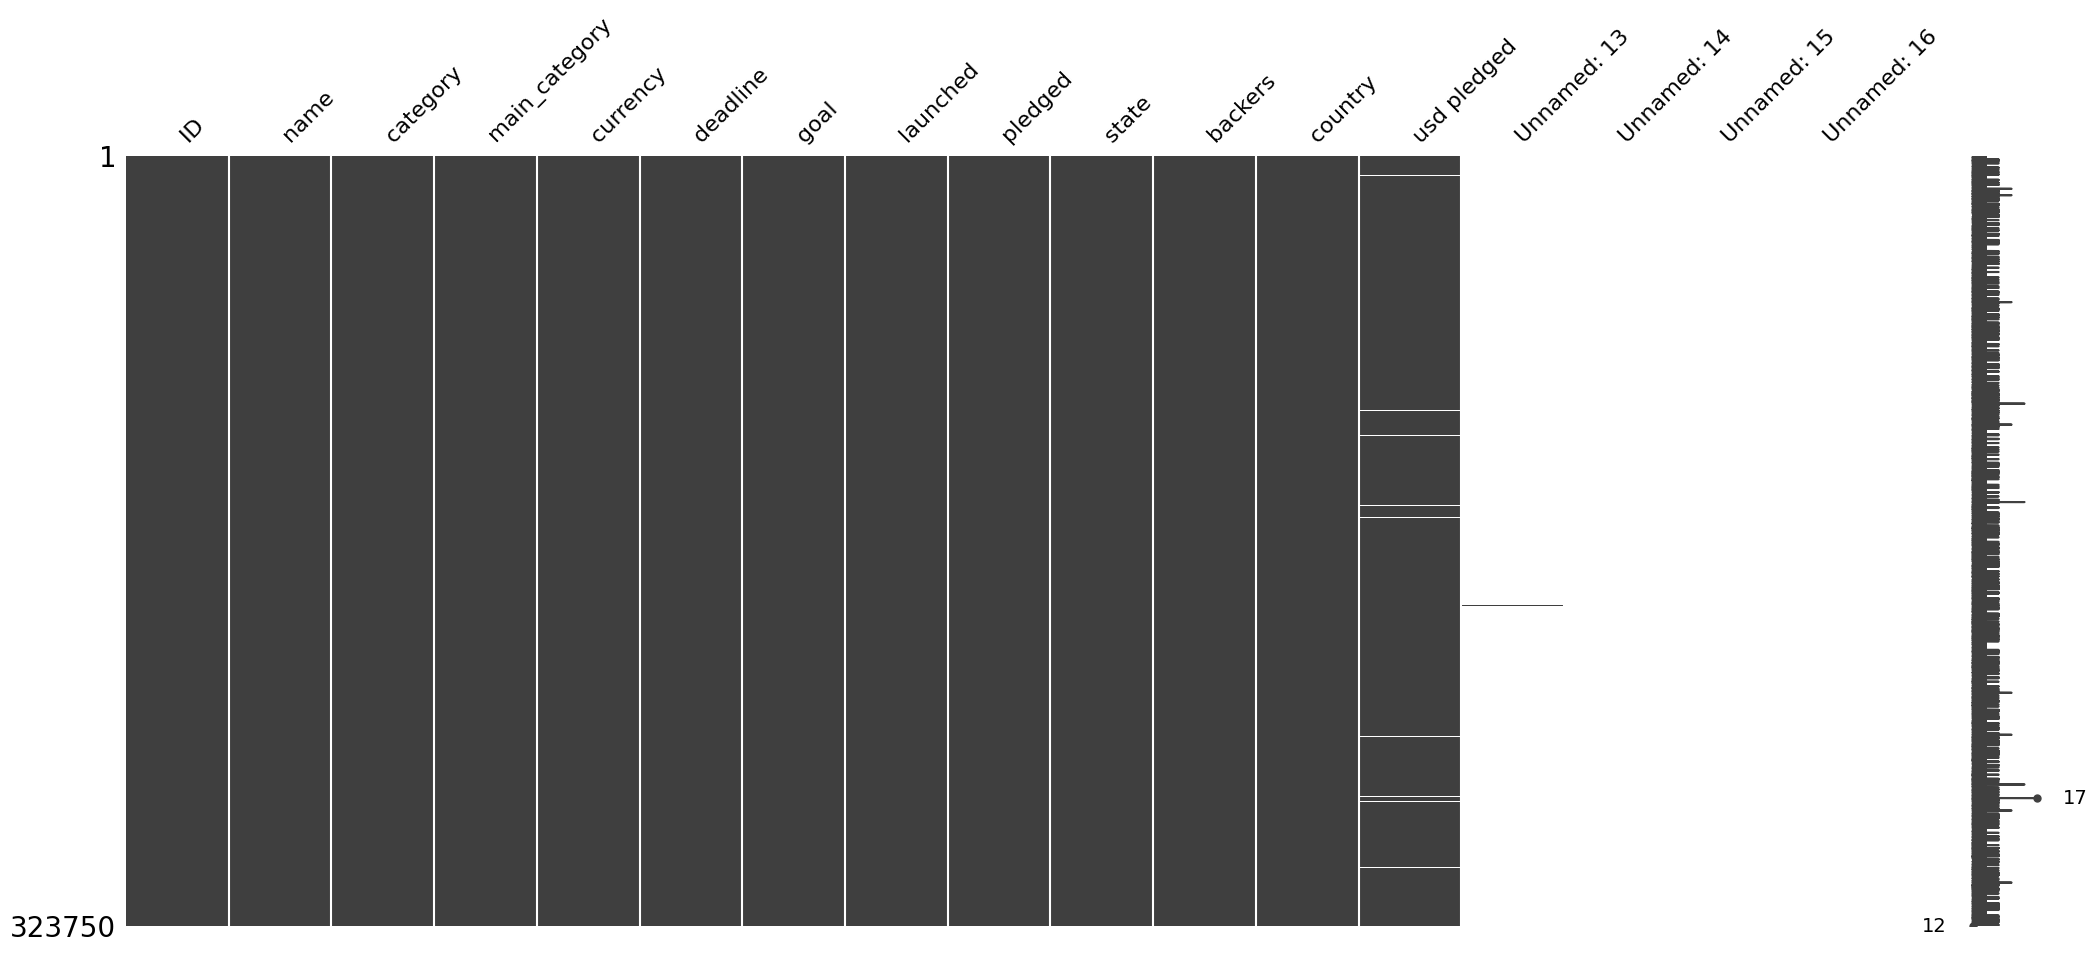

<Axes: >

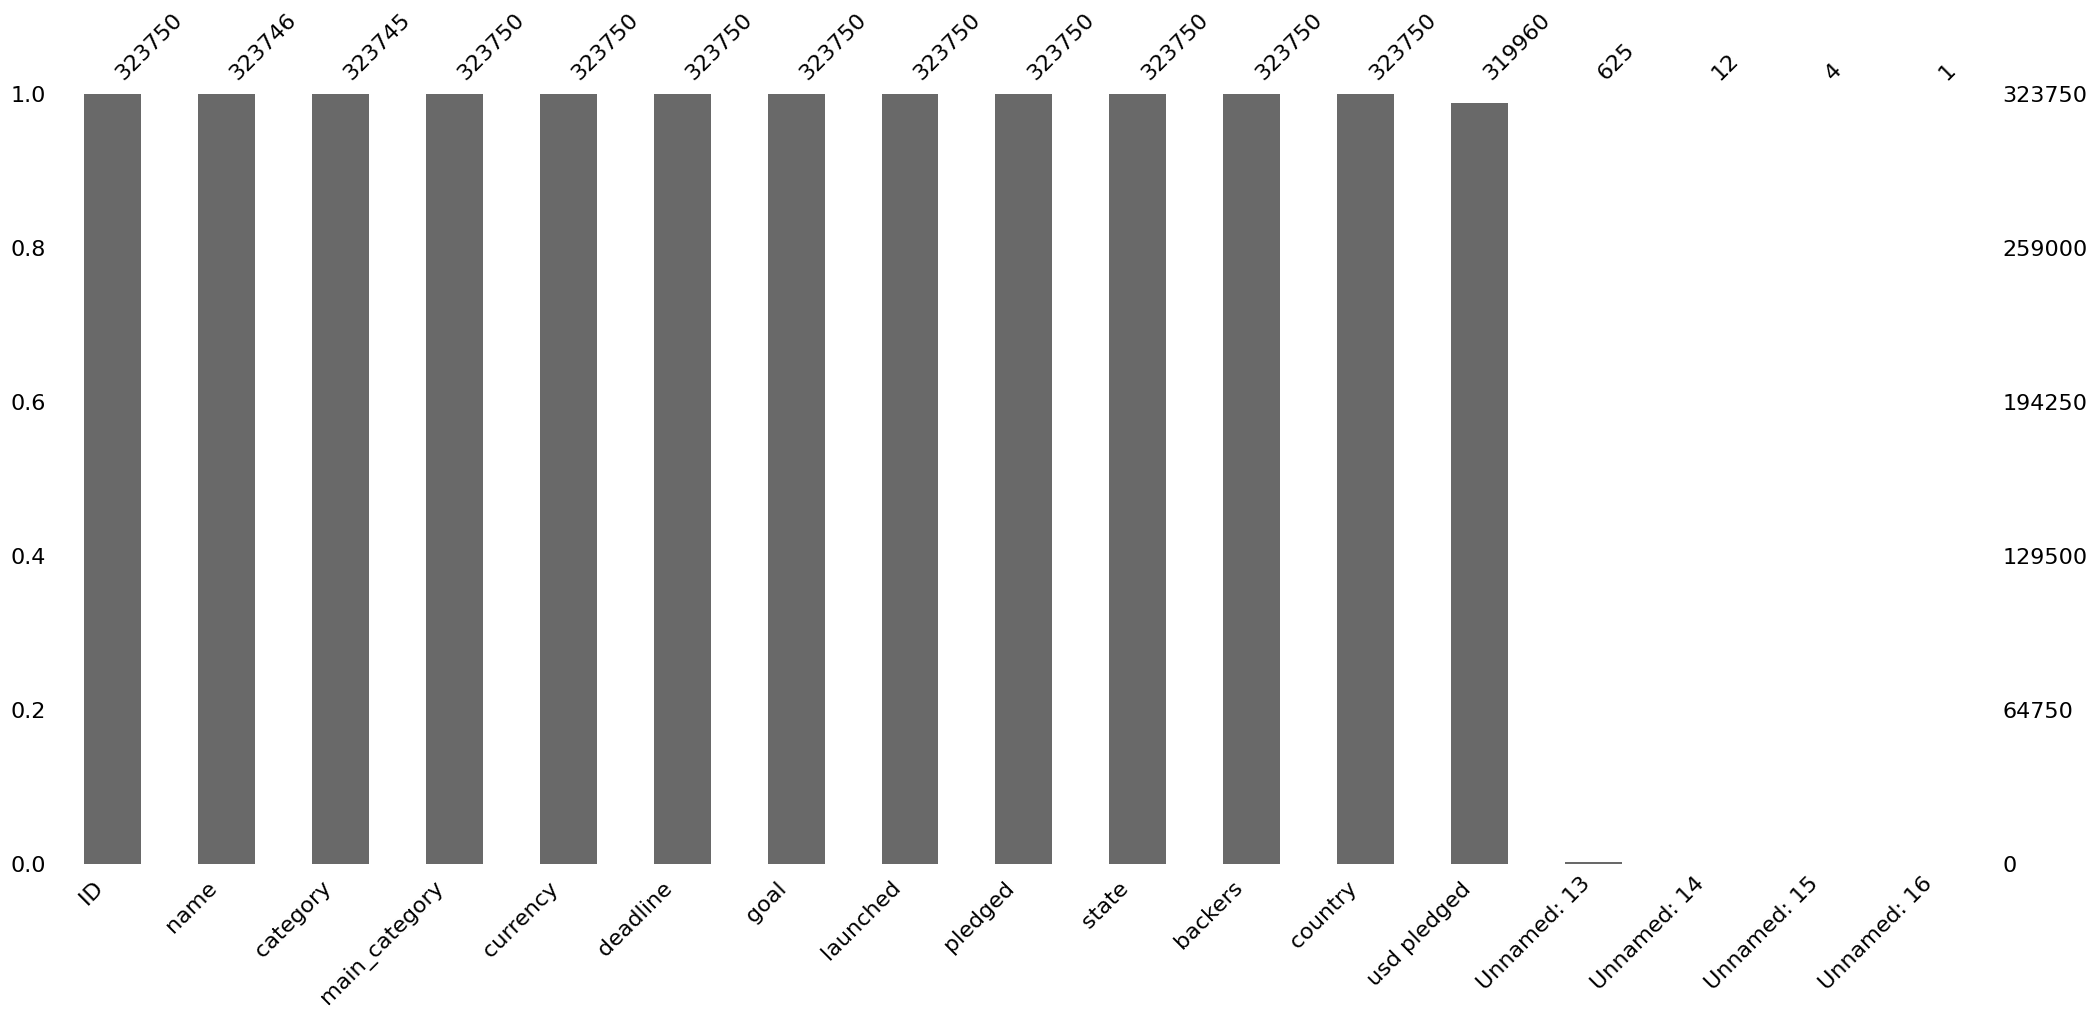

In [5]:
# Visualisation graphique des manques de données 
plt.figure(figsize = (15,9))
msno.matrix(df)
plt.show()

msno.bar(df)

### Après avoir examiné attentivement les caractéristiques "Unnamed : 13", "Unnamed : 14", "Unnamed : 15" et "Unnamed : 16", nous pouvons conclure que ces colonnes ne contiennent aucune information utile et qu'elles peuvent être supprimées sans avoir d'impact sur la qualité de notre ensemble de données

In [6]:
df = df.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              323750 non-null  int64 
 1   name            323746 non-null  object
 2   category        323745 non-null  object
 3   main_category   323750 non-null  object
 4   currency        323750 non-null  object
 5   deadline        323750 non-null  object
 6   goal            323750 non-null  object
 7   launched        323750 non-null  object
 8   pledged         323750 non-null  object
 9   state           323750 non-null  object
 10  backers         323750 non-null  object
 11  country         323750 non-null  object
 12  usd pledged     319960 non-null  object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


# Netoyage et analyse de la base de donnée

## Traitement de "State" et les autres variable catégoriques

In [8]:
df['state '].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended', '4262', '3984', '525', '0', '3035', '3273', '590',
       '23924', '12306', '13675', '2', '4690', '4488.01', '687', '450',
       '16185', '80', '1495', '20', '14309.36', '2011-06-04 01:17:48',
       '8542', '3363', '950', '1800.5', '352', '1320', '18', '2161',
       '2016-06-28 21:36:59', '331', '17861', '1', '2630', '1085', '3711',
       '103', '8609.6', '312', '11044', '5600.65', '630', '1010', '178',
       '2530', '3671', '65', '5', '4451', '16', '2000', '377', '125',
       '6169', '90', '765', '218.5', '1850', '166', '2107', '63', '10',
       '3300', '306', '13', '400', '7703', '650', '800', '4287', '1056',
       '5940', '45', '1827', '10890.45', '245', '276', '200', '30', '6',
       '797', '6126', '175', '12201', '3605.13', '1200', '325', '2632',
       '7271', '46', '2016-02-18 21:40:23', '465', '9430.8', '2308',
       '310', '7470', '2759', '9857.8', '6453', '6189', '6093', '51',
      

### On petu s'apercevoir que les seules information pertinentes et en accord avec cette caracteristiques sont lorsque l'information permet de connaitre l'état de la campagne cad (failed, canceled, successful, live ou bien undefined) le reste des information ce sont des informations non valide pu parasites et on pourra ainsi les éliminer soit en les catégorisant comme "etat inconnu" ou bien en le classfiant comme une valeur manquante. Nous avons opté pour la derniere option afin de faire un séparation entre les données de qualité de notre ensemble.

In [9]:
valid_values_list = ['failed', 'canceled', 'successful','live','undefined']
df.loc[~df['state '].isin(valid_values_list), 'state '] = pd.NA

In [10]:
df['state '].value_counts()

failed        168221
successful    113081
canceled       32354
live            4428
undefined       3555
Name: state , dtype: int64

### Ici nous allons appliquer la meme logique décritre plus haut pour le feature "Currency" elle sera apllique aussi au restes des features présent dans l'ensemble de donné.

In [11]:
df['currency '].value_counts()

USD                   260298
GBP                    27968
CAD                    12197
EUR                    11555
AUD                     6347
SEK                     1300
NZD                     1164
DKK                      841
NOK                      540
CHF                      478
MXN                      214
Publishing               123
SGD                      119
HKD                       97
Film & Video              83
Music                     73
Art                       64
Food                      44
Design                    44
Technology                44
Games                     36
Fashion                   32
Photography               25
Journalism                14
Theater                   13
Comics                    13
Crafts                    10
Dance                      5
Rock                       1
Software                   1
 Be active!                1
Nonfiction                 1
 clothing company          1
Painting                   1
 tango and cul

In [12]:
currency_valid_values = df['currency '].value_counts().keys()[:11]
df.loc[~df['currency '].isin(currency_valid_values), 'currency '] = 'otherCurrency'

In [13]:
df['currency '].value_counts()

USD              260298
GBP               27968
CAD               12197
EUR               11555
AUD                6347
SEK                1300
NZD                1164
otherCurrency       848
DKK                 841
NOK                 540
CHF                 478
MXN                 214
Name: currency , dtype: int64

### Feature "Category"

In [14]:
value_counts = df['category '].value_counts()
values_to_change = value_counts[value_counts == 1].index.tolist()


In [15]:
df['category '].value_counts()

Product Design                  17477
Documentary                     14891
Music                           13907
Shorts                          11681
Tabletop Games                  10708
                                ...  
 EP                                 1
 a feature length HD film           1
 kids vs. cars                      1
 Path of Light                      1
 a bike quest in New Zealand        1
Name: category , Length: 770, dtype: int64

### On peut voir qu'il y a 770 differentes categories possibles. Cependant, il est facile de s'apercevoir en regardant les titres de ces categories, qu'il existe un grand nombre de valeurs fautives qui ne sont pas de categories mais qui semble etre des erreurs de frappe ou bien une erreur lors de la rentree d'information dans la base de donnée. Lucky for us, il est facil d'identifier un pattern avec ce type d'erreur qui nous permet de les identifier rapidement en effet, ce genre d'erreur on une tendance a ne pas se repeter et a etre presentes qu'une seule fois dans la colonne du dataset. Ainsi, nous alons identifier toutes les valeurs qui n'apparaissent qu'une seule fois et nous pouvons les remplacer par la valeur "other" afin de faire un cleaning du dataset en question.

In [16]:
value_counts = df['category '].value_counts()
values_to_change = value_counts[value_counts == 1].index.tolist()
values_to_change

[' London Underground Album Project',
 ' Grass-Route Collection)',
 ' Still Singing For Haiti',
 ' a life-sized bucking horse',
 ' Rise of Alpha (Novel To Film)',
 ' 40 Exercises. 1 Product. Zero Complication.',
 ' A southern Tour',
 ' Helping my family',
 ' Help Turn Up The Volume In The Arts!',
 ' Volume One',
 ' Season 1',
 ' Encourage a friend',
 ' A Once-In-A-Lifetime Session',
 ' Magazine & YouTube Channel',
 ' A Story of Character Not Forgotten',
 ' We thought we would make it!!!',
 " Rock 'n' Roll Odyssey for Eco-Kids.",
 "  A Faerie's Tale.",
 'TASTIC COVERSS(they stay on when fan is running)',
 ' Sign Language Translation',
 ' Finding the least toxic cosmetic products',
 ' Art Festival',
 ' reclaimed wood to fit your lifestyle.',
 ' a web-based SSH interface for dev-op tasks.',
 't',
 ' the card game.',
 ' A Story of Loss in a Community Misunderstood',
 ' Grocery Store Expansion',
 'An Explanation of Nature',
 ' Cultural traditions & celebration',
 ' Trauma Affected Genes',
 

In [17]:
df.loc[df['category '].isin(values_to_change), 'category '] = pd.NA

In [18]:
df['category '].value_counts()

Product Design        17477
Documentary           14891
Music                 13907
Shorts                11681
Tabletop Games        10708
                      ...  
 a short film             3
 an Art Exhibition        2
 Made in the USA          2
 Part 1                   2
 give them a try!         2
Name: category , Length: 165, dtype: int64

### On peut deja voir que la liste de valeurs a ete grandement dimunier nous passons de 770 categories a seulement 166 ce qui semble avoir plus de sens. Maintenant, allons voir les 35 categories avec le moins de presence dans le dataset et nous allons enlever des valeurs qui semblerait etre des erreurs.

In [19]:
df['category '].value_counts().keys()[-35:]

Index(['Literary Journals', 'Bacon', 'Textiles', 'Fabrication Tools',
       'Movie Theaters', 'Makerspaces', 'Puzzles', 'Printing', 'Photo',
       'Stationery', 'Romance', 'Video Art', 'Knitting', 'Crochet',
       'Workshops', 'Translations', 'Glass', 'Pet Fashion', 'Latin',
       'Embroidery', 'Typography', 'Pottery', 'Quilts', 'Weaving',
       'Residencies', 'Letterpress', 'Chiptune', 'Taxidermy', ')', '-)',
       ' a short film', ' an Art Exhibition', ' Made in the USA', ' Part 1',
       ' give them a try!'],
      dtype='object')

### On s'apercois que la majorite des titres semble avoir un sens raisonable avec la categorie sauf pour certains symboles tels que "')", "-)" nous pouvons alors les regrouper avec le reste dans la categorie créee (other).

In [20]:
values_to_change=[')','-)']
df.loc[df['category '].isin(values_to_change), 'category '] = pd.NA

In [21]:
df['category '].value_counts().keys()[-35:]

Index(['Blues', 'Literary Journals', 'Animals', 'Bacon', 'Textiles',
       'Fabrication Tools', 'Movie Theaters', 'Makerspaces', 'Puzzles',
       'Printing', 'Photo', 'Stationery', 'Romance', 'Video Art', 'Knitting',
       'Crochet', 'Workshops', 'Translations', 'Glass', 'Pet Fashion', 'Latin',
       'Embroidery', 'Typography', 'Pottery', 'Quilts', 'Weaving',
       'Residencies', 'Letterpress', 'Chiptune', 'Taxidermy', ' a short film',
       ' an Art Exhibition', ' Made in the USA', ' Part 1',
       ' give them a try!'],
      dtype='object')

## Country 

In [22]:
df['country '].value_counts()

US      257565
GB       27509
CA       11992
AU        6236
N,"0      3790
         ...  
582          1
26           1
27           1
136          1
176          1
Name: country , Length: 162, dtype: int64

In [23]:
value_counts = df['country '].value_counts()
values_to_change = value_counts[value_counts == 1].index.tolist()
#values_to_change

In [24]:
df.loc[df['country '].isin(values_to_change), 'country '] = pd.NA

In [25]:
df['country '].value_counts().keys()[-100:]

Index(['US', 'GB', 'CA', 'AU', 'N,"0', 'DE', 'NL', 'FR', 'IT', 'ES', 'SE',
       'NZ', 'DK', 'IE', 'NO', 'CH', 'BE', 'AT', 'MX', 'SG', '0', 'HK', '1',
       '3', '2', 'LU', '4', '7', '10', '6', '12', '5', '16', '40', '29', '13',
       '19', '14', '9', '37', '18', 'failed', '8', '17', '20', '22', '25',
       '50', '24', '41', '42', '11', '46', '84', '69', '31', '32', '55', '23',
       '49', '88', '21', '114', '66', '59', 'successful', '91', '57', '108',
       '51', '89', '15', '30', '58', '56', '116', '60', '119', '75', '122',
       '107', '73', '195', '54', '28', '45', '34'],
      dtype='object')

In [26]:
df.loc[df['country '].apply(pd.to_numeric, errors='coerce').notnull(), 'country '] = pd.NA

In [27]:
df['country '].unique()

array(['GB', 'US', 'CA', 'NO', 'AU', 'IT', 'DE', 'IE', 'ES', 'N,"0', 'MX',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', <NA>,
       'SG', 'failed', 'successful'], dtype=object)

In [28]:
df.loc[df['country '].isin(['N,"0']), 'country '] = 'NO'

In [29]:
df['country '].unique()

array(['GB', 'US', 'CA', 'NO', 'AU', 'IT', 'DE', 'IE', 'ES', 'MX', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', <NA>, 'SG',
       'failed', 'successful'], dtype=object)

In [30]:
df.loc[df['country '].isin(['failed','successful']), 'country '] = pd.NA

In [31]:
df['country '].unique()

array(['GB', 'US', 'CA', 'NO', 'AU', 'IT', 'DE', 'IE', 'ES', 'MX', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', <NA>, 'SG'],
      dtype=object)

## Deadline

In [32]:
df['deadline '].value_counts()

USD                    508
GBP                     64
2012-01-01 05:59:00     47
2015-01-01 05:59:00     41
2014-11-01 04:59:00     38
                      ... 
2016-01-06 17:19:31      1
2015-05-26 06:37:07      1
2015-01-18 22:27:01      1
2015-04-22 21:49:28      1
2011-08-16 09:07:47      1
Name: deadline , Length: 294813, dtype: int64

In [33]:
df.loc[df['deadline '].isin(['USD','GBP']), 'deadline '] = pd.NA

In [34]:
df['deadline '].value_counts()

2012-01-01 05:59:00    47
2015-01-01 05:59:00    41
2014-11-01 04:59:00    38
2012-03-01 05:59:00    33
2016-01-01 05:59:00    31
                       ..
2016-01-06 17:19:31     1
2015-05-26 06:37:07     1
2015-01-18 22:27:01     1
2015-04-22 21:49:28     1
2011-08-16 09:07:47     1
Name: deadline , Length: 294811, dtype: int64

In [35]:
non_date_mask = pd.to_datetime(df['deadline '], errors='coerce').isna()
df.loc[non_date_mask, 'deadline '] = pd.NA

In [36]:
unique_types = df['deadline '].apply(type).unique()
print(unique_types)

[<class 'str'> <class 'pandas._libs.missing.NAType'>]


In [37]:
df['deadline '] = pd.to_datetime(df['deadline '], errors='coerce')

## "Main_Category"

In [38]:
df['main_category '].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism', 'Metal', 'Cookbooks', 'Web',
       'Shorts', 'Plays', 'Hardware', 'Playing Cards', 'World Music',
       'Mobile Games', 'Camera Equipment', 'Classical Music',
       'Conceptual Art', 'Nonfiction', 'Product Design', 'Documentary',
       'Video Games', ' 50 Years in the Making', 'Country & Folk',
       'Mixed Media', 'Comic Books', ' Retro Gaming art.', 'Places',
       'Events', 'Fiction', 'Tabletop Games', 'Video', 'Performance Art',
       'Small Batch', "Children's Books", 'Poetry', 'Public Art',
       'Art Books', 'Drama', 'Apparel', 'Sculpture', 'DIY', 'Hip-Hop',
       'Accessories', 'People', 'Webseries', 'Interactive Design',
       'Periodicals', 'Vegan', 'Indie Rock', 'Academic', 'Pop',
       ' M.ercury E.dition)', 'Faith', 'Jazz', 'Space Exploration',
       'Performances', 'Digital A

### En regardant les valeurs possibles et présente dans cette feature, on ne constate pas d'anomalie extremes dans cette colonne et on décide de la garder telle qu'elle est. Una analyse ultérieure sera faite pour s'assurer de sa validité

## "Goal"

In [39]:
df['goal '].value_counts()

5000                   25520
10000                  21875
1000                   14574
3000                   13782
2000                   13297
                       ...  
574                        1
1325000                    1
2012-05-07 04:02:00        1
49825                      1
28559                      1
Name: goal , Length: 8188, dtype: int64

In [40]:
df.loc[~pd.to_numeric(df['goal '], errors='coerce').notnull(), 'goal '] = pd.NA

In [41]:
df['goal '].isna().sum()

632

## "Launched"

In [42]:
pd.to_datetime(df['launched '], errors='coerce').isna().sum()

581

In [43]:
non_date_mask = pd.to_datetime(df['launched '], errors='coerce').isna()
df.loc[non_date_mask, 'launched '] = pd.NA

## "Backers"

In [44]:
pd.to_numeric(df['backers '], errors='coerce').isna().sum()

623

In [45]:
df.loc[df['backers '].apply(pd.to_numeric, errors='coerce').isna(), 'backers '] = pd.NA

In [46]:
df['backers '].isna().sum()

623

## "USD Pledged"

In [47]:
unique_types = df['usd pledged '].apply(type).unique()
print(unique_types)

[<class 'str'> <class 'float'>]


In [48]:
df2 = pd.DataFrame(df[df['usd pledged '].apply(lambda x: isinstance(x, float))])

In [49]:
df['usd pledged '].isna().sum()

3790

In [50]:
condition = df['currency '] == 'USD'

df['usd pledged '] = df.apply(
    lambda row: row['pledged '] if pd.isna(row['usd pledged ']) and condition[row.name] else row['usd pledged '],
    axis=1
)

In [51]:
df['usd pledged '].isna().sum()

1057

In [52]:
currencies = df['currency '].value_counts().keys().to_list()

In [53]:
currencies.remove('otherCurrency')
currencies.remove('USD')

In [54]:
#res = dict(zip(test_keys, test_values))
currencies


['GBP', 'CAD', 'EUR', 'AUD', 'SEK', 'NZD', 'DKK', 'NOK', 'CHF', 'MXN']

Ici nous allons employé une stratégie légérement differente afin de recuperer le plus d'information manquante possible. C'est à dire, nous allons essayer de remplir les information manquante lorsque ceci est possible a l'aide de l'information d'autre caracteristiques. Ceci afin de conserver et d'augmenter la qualité de l'ensemble.

La strategie et d'utiliser les colonnes "currency" (type de monnaie) , "deadline" (date), et "pledged" (quantité recuilli) afin de pouvoir remplir les lignes manquante de la quantité d'argent recueilli en USD. Pour ceci nous utilison une librairie qui permet de convertir les monnaies à une date précise. 

In [55]:
df['launched '] = pd.to_datetime(df['launched '], errors='coerce')

In [56]:
from currency_converter import CurrencyConverter
from datetime import date

c = CurrencyConverter(fallback_on_missing_rate=True)

def get_USD(row):
    if row['currency '] != 'otherCurrency':
        return c.convert(row['pledged '], row['currency '], 'USD', row['deadline '])

df['usd pledged '] = df.apply(get_USD, axis=1)

In [57]:
df.loc[df['currency '] == 'otherCurrency', 'currency '] = pd.NA

In [58]:
unique_types = df['deadline '].apply(type).unique()
print(unique_types)

[<class 'pandas._libs.tslibs.timestamps.Timestamp'>
 <class 'pandas._libs.tslibs.nattype.NaTType'>]


In [59]:
#df.loc[df['currency '] == 'otherCurrency']

In [60]:
df.loc[df['pledged '].apply(pd.to_numeric, errors='coerce').isnull(), 'pledged '] = pd.NA

In [61]:
df['pledged '].isna().sum()

624

### Nous pouvon maintenant vérifier et comparer le valeur manquante de manière visuelle avec le graphique créé plus haut. Nous constaton que la manque de donnée a ete réduit et que la qualité a ete ameliorée. Il existe toujours des information manquantes que l'on traitera par la suite.

<Figure size 1500x900 with 0 Axes>

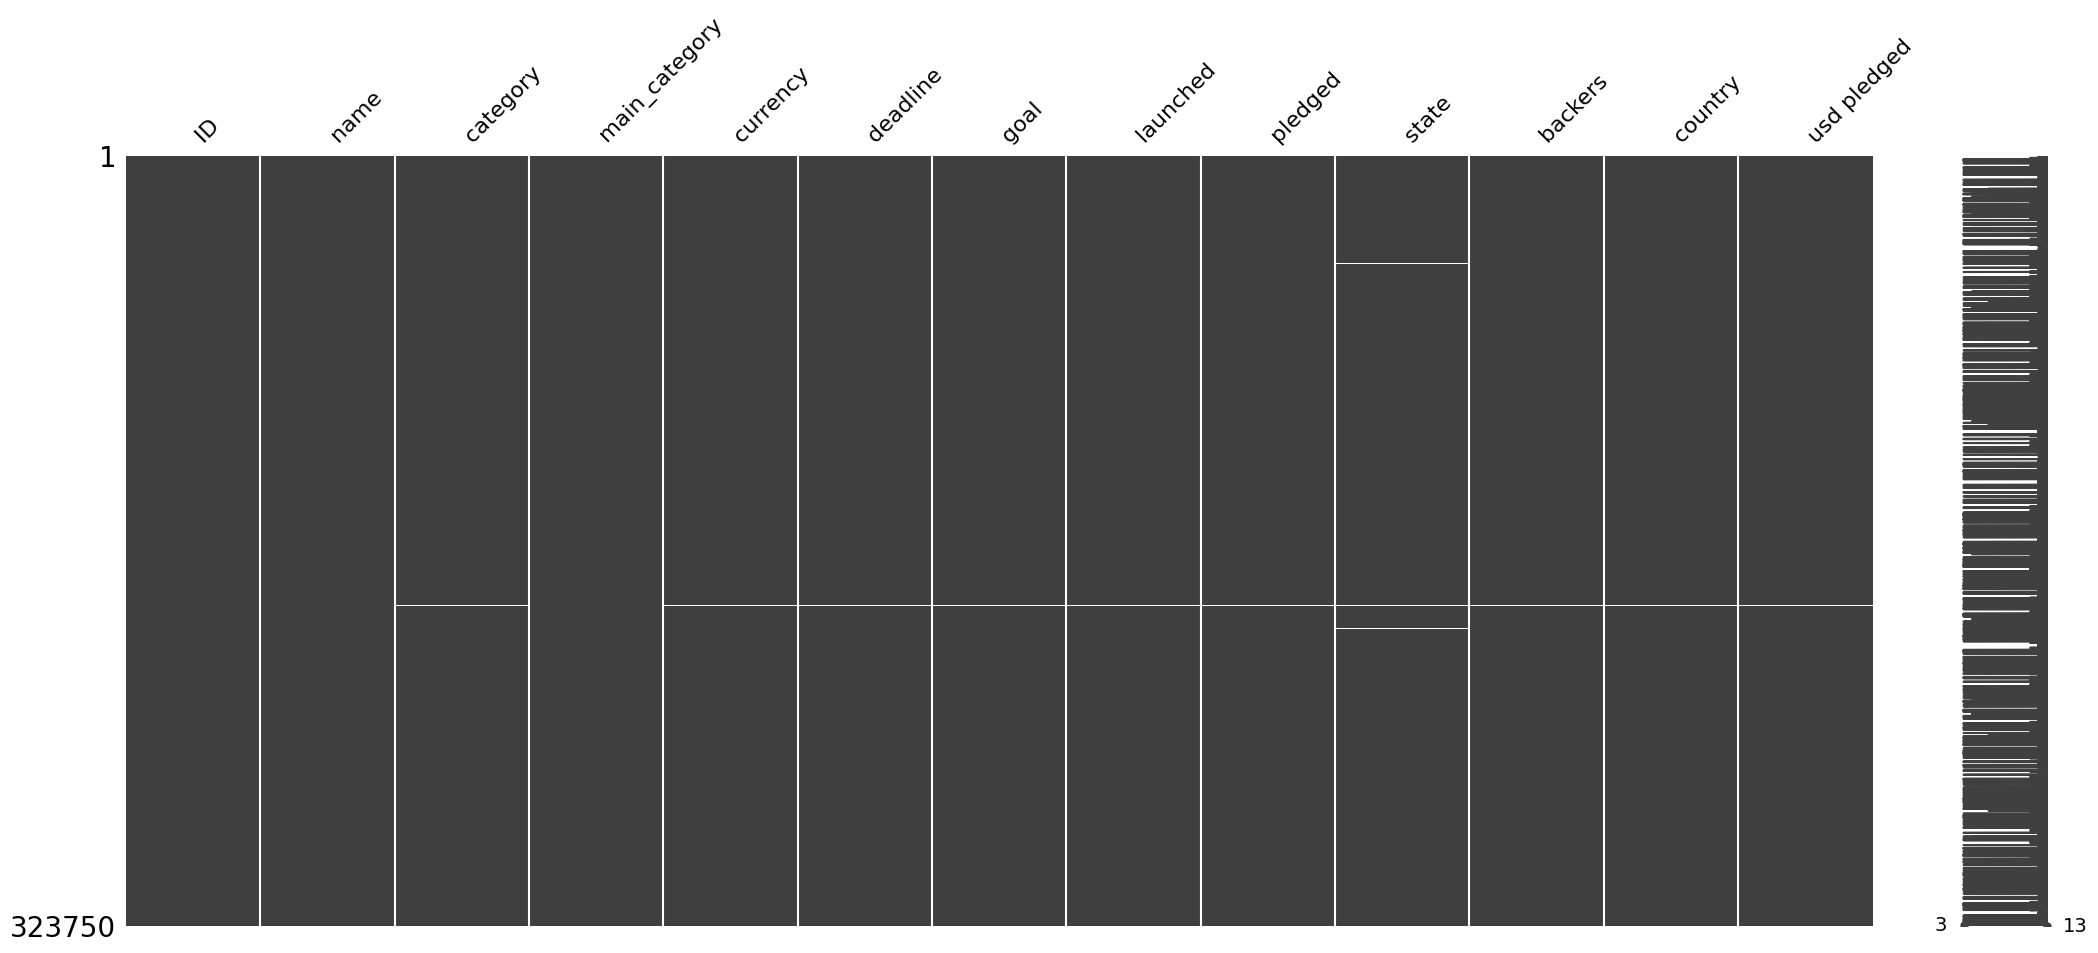

<Axes: >

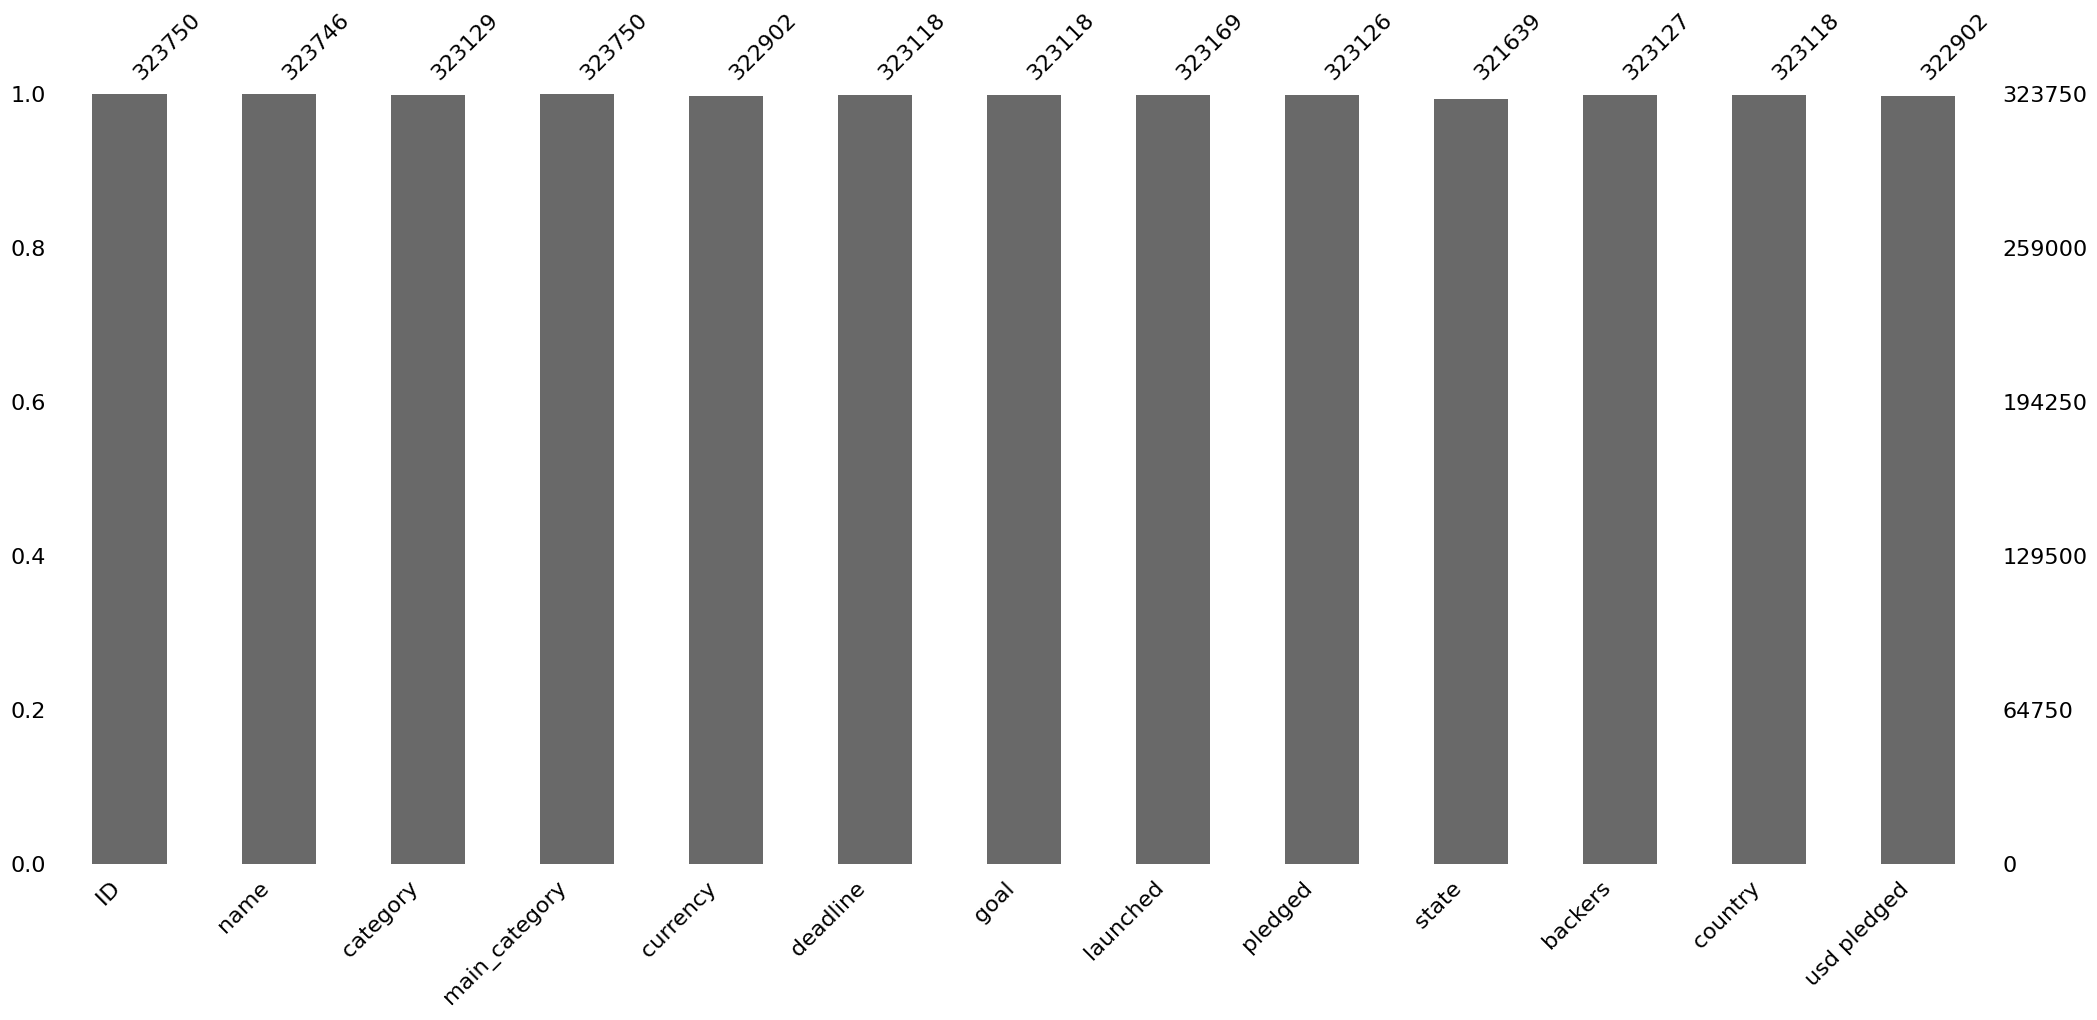

In [62]:
plt.figure(figsize = (15,9))
msno.matrix(df)
plt.show()

msno.bar(df)

### Déterminon le nombre total de ligne contenant au moins une information manquante 

In [63]:
df.isna().any(axis=1).sum()

2325

Il s'agit d'un total de 2325 lignes contenant un manque d'information après notre premier traitement. Ceci correspond seulement au 0.7% de manque d'information. Il est aussi facil de s'apercevoir avec le graph visuel ci-haut que le manque d'infromation pour la plupart des "feature" se trouve au meme endroit. Ainsi, il s'agit de quelques lignes ou il existe un manque d'information sur plusieurs colonnes, ceci temoigne donc d'une entree de donné de basse qualité. Nous pouvons donc éliminer ce manque d'information utilisé qui ne represente moins que le 1% de perte de donné sans avoir un impact pour notre modèle de prédiction.

In [64]:
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321425 entries, 0 to 323749
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              321425 non-null  int64         
 1   name            321425 non-null  object        
 2   category        321425 non-null  object        
 3   main_category   321425 non-null  object        
 4   currency        321425 non-null  object        
 5   deadline        321425 non-null  datetime64[ns]
 6   goal            321425 non-null  object        
 7   launched        321425 non-null  datetime64[ns]
 8   pledged         321425 non-null  object        
 9   state           321425 non-null  object        
 10  backers         321425 non-null  object        
 11  country         321425 non-null  object        
 12  usd pledged     321425 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 34.3+ MB


### Visualisons maintenant notre ensemble de données avec lequel nous travaillons pour construire notre modèle ML de prédiction

<Figure size 1500x900 with 0 Axes>

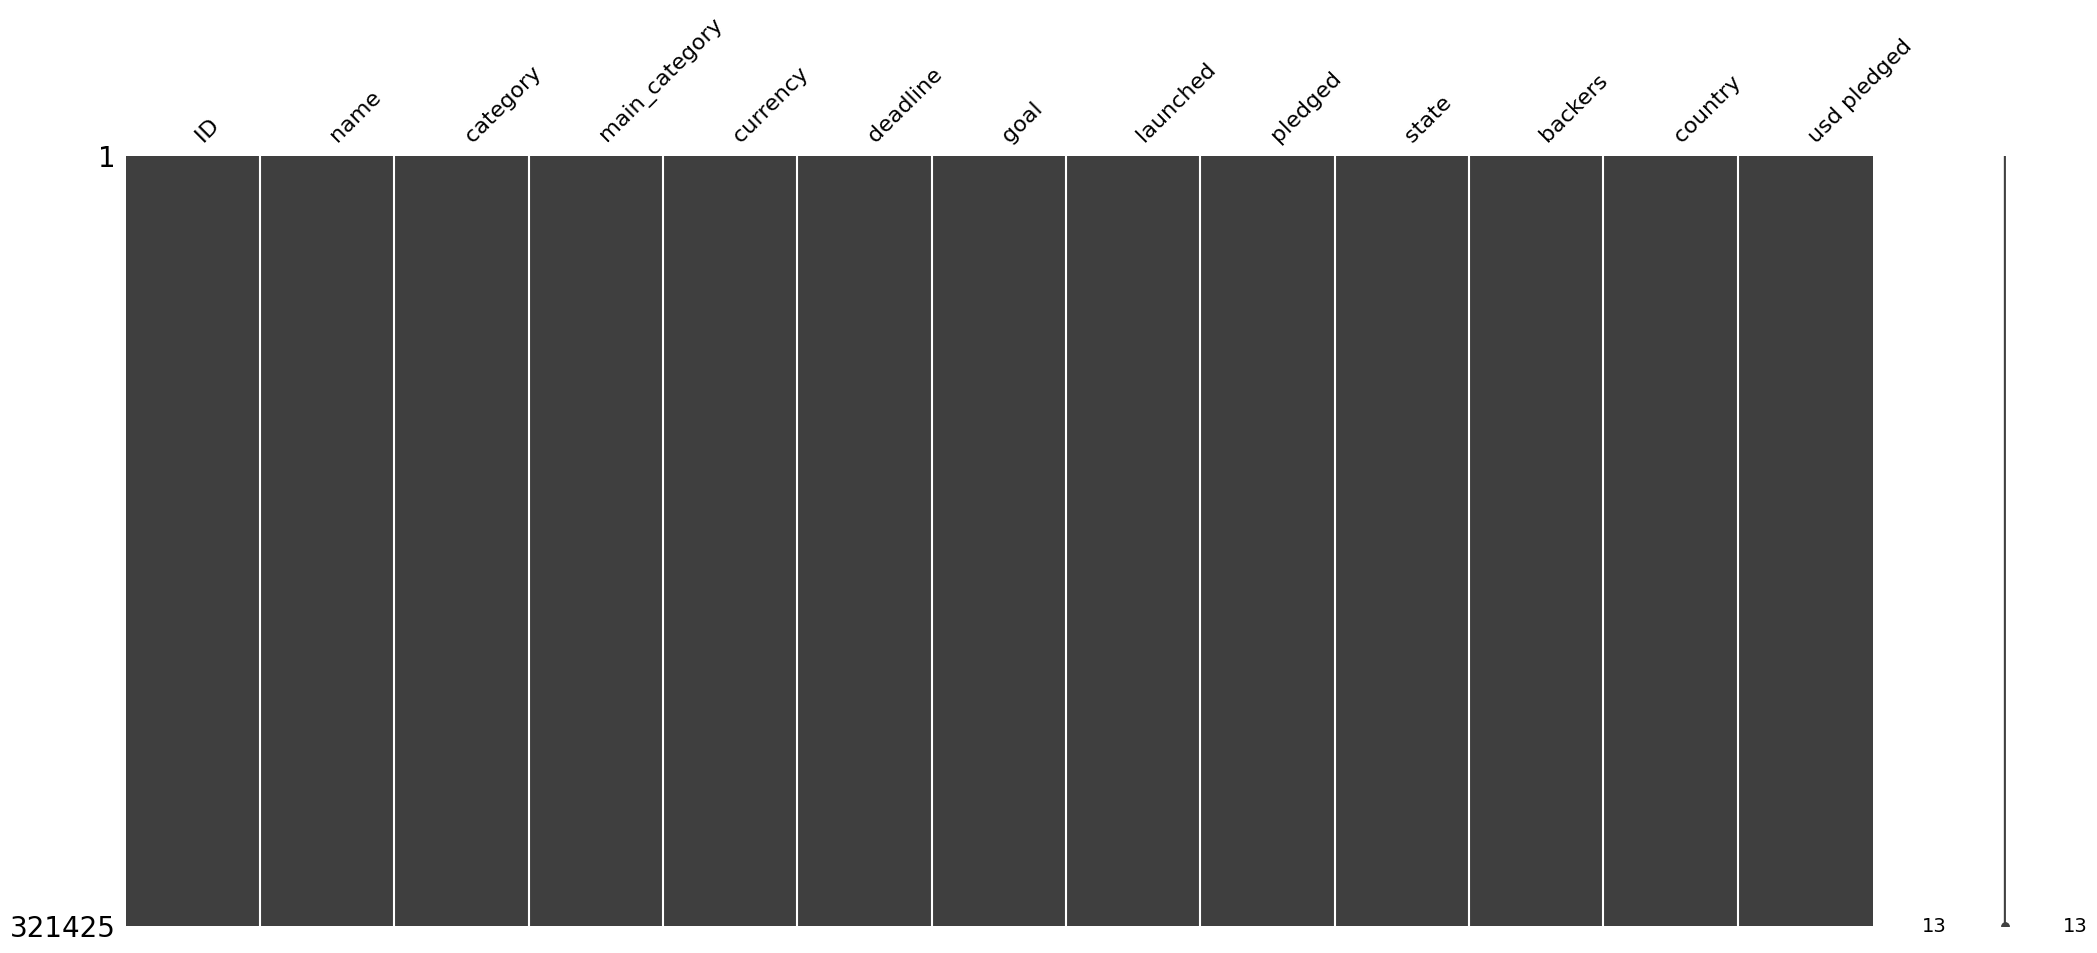

<Axes: >

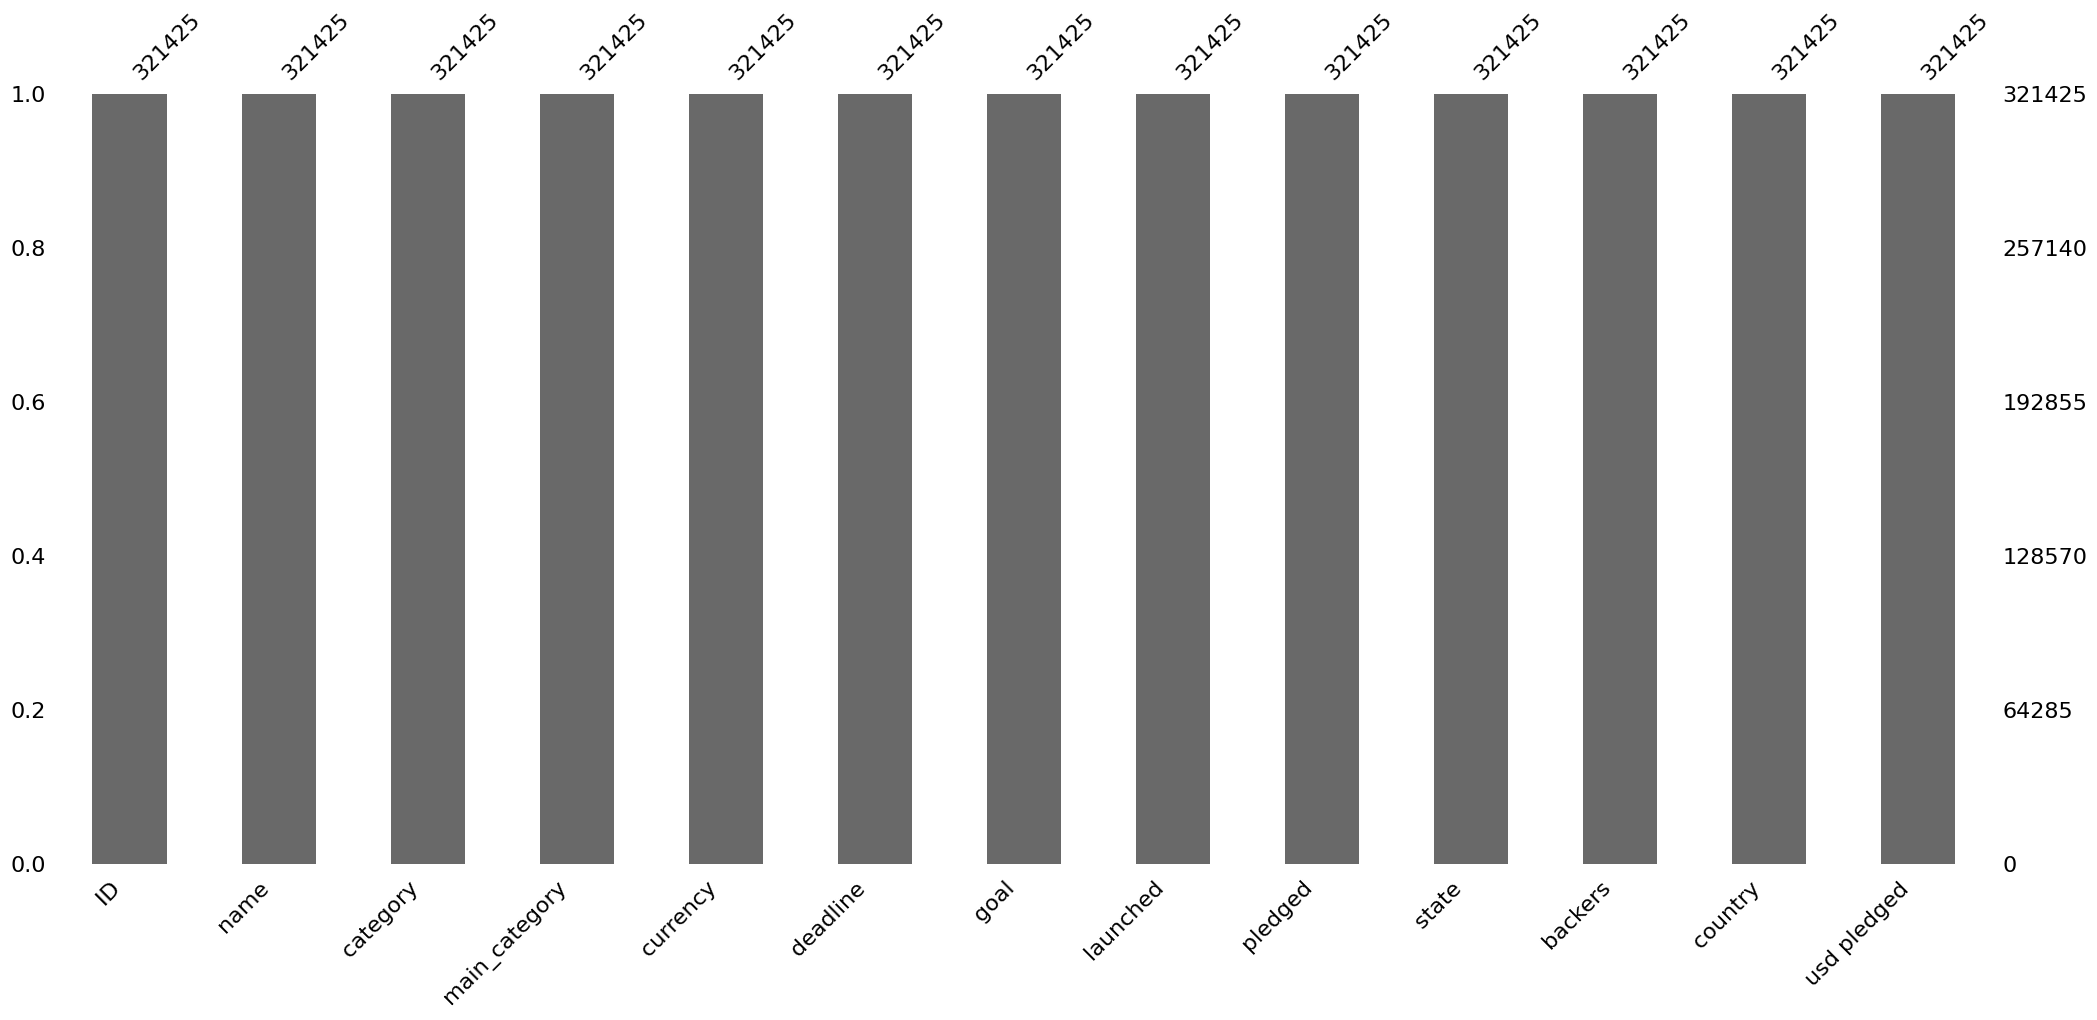

In [65]:
plt.figure(figsize = (15,9))
msno.matrix(df_clean)
plt.show()

msno.bar(df_clean)

#### Nous gardon tout de même la base de donnée de "mauvaise qualité" pour pouvoir l'éxaminer et peut-etre meme la traiter d'avantage si jugé necessaire.

In [66]:
df_mv = df[df.isna().any(axis=1)]

In [67]:
df_mv.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
329,1001732009,DotPen : Redefines drawing and writing for sma...,Product Design,Design,USD,2014-08-09 21:17:10,25000,2014-06-30 21:17:10,39693,<NA>,647,US,39693.0000
827,1004830984,Qi Aerista: The Ultimate Wi-Fi-Enabled Smart T...,Product Design,Design,<NA>,2016-12-15 16:51:13,600000,2016-11-15 16:51:13,1024369,live,961,HK,NaN
899,100524873,PRESIDENT OF THE UNITED STATES (Suspended),Academic,Publishing,USD,2015-10-25 04:54:42,5500,2015-08-26 05:54:42,0,<NA>,0,US,0.0000
961,1005618996,Masters of the Tooniverse Podcast (Suspended),Webseries,Film & Video,USD,2013-07-02 04:30:00,3200,2013-05-30 19:24:22,3226,<NA>,24,US,3226.0000
1024,1006032032,Buddy day in Heidepark Soltau (Suspended),People,Photography,EUR,2015-06-11 11:06:35,200,2015-05-12 11:06:35,13,<NA>,3,DE,14.6016


## Transformation de type de donné pour chacune des caracteristiques

In [68]:
df_clean['backers '] = df_clean['backers '].astype('int')
df_clean['pledged '] = pd.to_numeric(df_clean['pledged '], errors='coerce')
df_clean['goal '] = pd.to_numeric(df_clean['goal '], errors='coerce')


In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321425 entries, 0 to 323749
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              321425 non-null  int64         
 1   name            321425 non-null  object        
 2   category        321425 non-null  object        
 3   main_category   321425 non-null  object        
 4   currency        321425 non-null  object        
 5   deadline        321425 non-null  datetime64[ns]
 6   goal            321425 non-null  float64       
 7   launched        321425 non-null  datetime64[ns]
 8   pledged         321425 non-null  float64       
 9   state           321425 non-null  object        
 10  backers         321425 non-null  int64         
 11  country         321425 non-null  object        
 12  usd pledged     321425 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 34.3+ MB


### Creation d'une categorie "Fund_Target" qui permet de savoir si le goal monnaitaire a ete atteint. La valeur 1 représente que le goal a été atteint alors que la valeur 0 est pour les projets dont le but monnaitaire désirée n'as pas été atteint (Feature engineering) 

In [70]:
df_clean['Fund_Target'] = np.where(df_clean['pledged '] >= df_clean['goal '], 1 , 0)

# Exploratory Data Analysis

## Distribution des campagnes

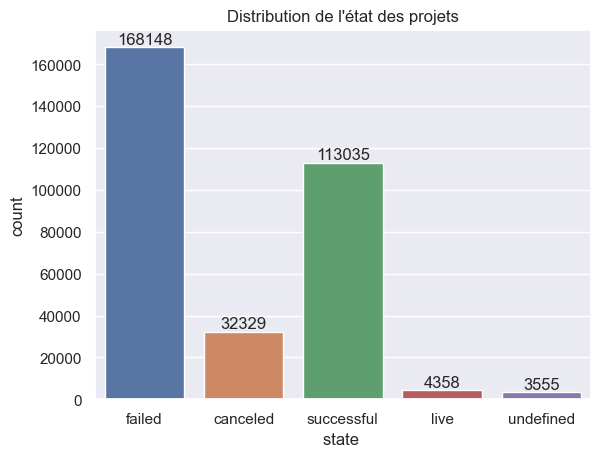

In [71]:
sns.set(style='darkgrid')
ax = sns.countplot(x='state ', data = df_clean)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., 
            p.get_height() + 0.2, 
            f'{int(p.get_height())}', 
            ha='center', 
            va='bottom')
plt.title("Distribution de l'état des projets")
plt.show()

## Exploration des campagnes

In [72]:
df_clean.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Fund_Target
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,0
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,1


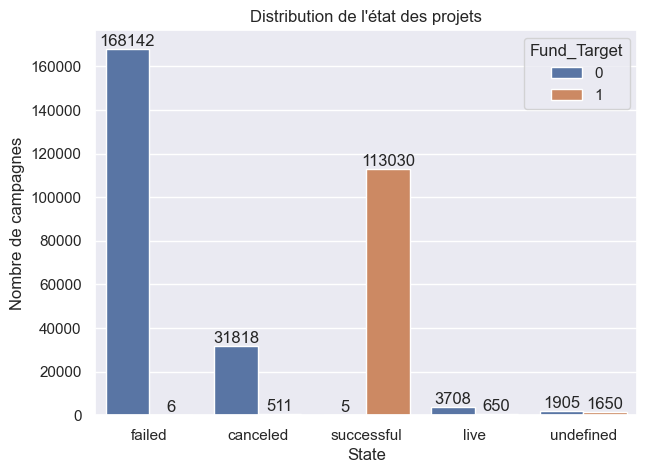

In [73]:
plt.figure(figsize=(7,5))
sns.set(style='darkgrid')
ax = sns.countplot(x='state ', data = df_clean,hue='Fund_Target')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., 
            p.get_height() + 0.2, 
            f'{int(p.get_height())}', 
            ha='center', 
            va='bottom')
plt.title("Distribution de l'état des projets")
plt.ylabel('Nombre de campagnes')
plt.xlabel('State')
plt.show()

In [74]:
pivot_table = df_clean.pivot_table(index='state ',
                                   columns='main_category ', values='ID ', aggfunc='count', fill_value=0)


In [75]:
#plt.figure(figsize=(20, 10))
#sns.barplot(data=sorted_projects, x='main_category ', y='ID ', hue='state ', dodge=True)
#plt.xlabel('Count')
#plt.ylabel('Project')
#plt.title('Count of States for Each Project Sorted by Category')
#plt.legend(title='Category')
#plt.show()

In [76]:
pivot_table

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,1885,702,681,137,3111,2125,5161,1932,4961,435,2938,884,3083,3748,546
failed,12088,3404,4630,1089,12024,11492,29646,13598,13003,2657,19193,5740,19915,16332,3337
live,254,117,138,32,523,326,499,277,457,60,467,85,446,612,65
successful,9651,4499,1670,2101,7939,4306,21404,5253,9382,869,21761,2903,10253,5054,5990
undefined,0,0,0,1,2,3,851,0,1,0,2230,1,462,3,1


### Distribution et compréhension des données

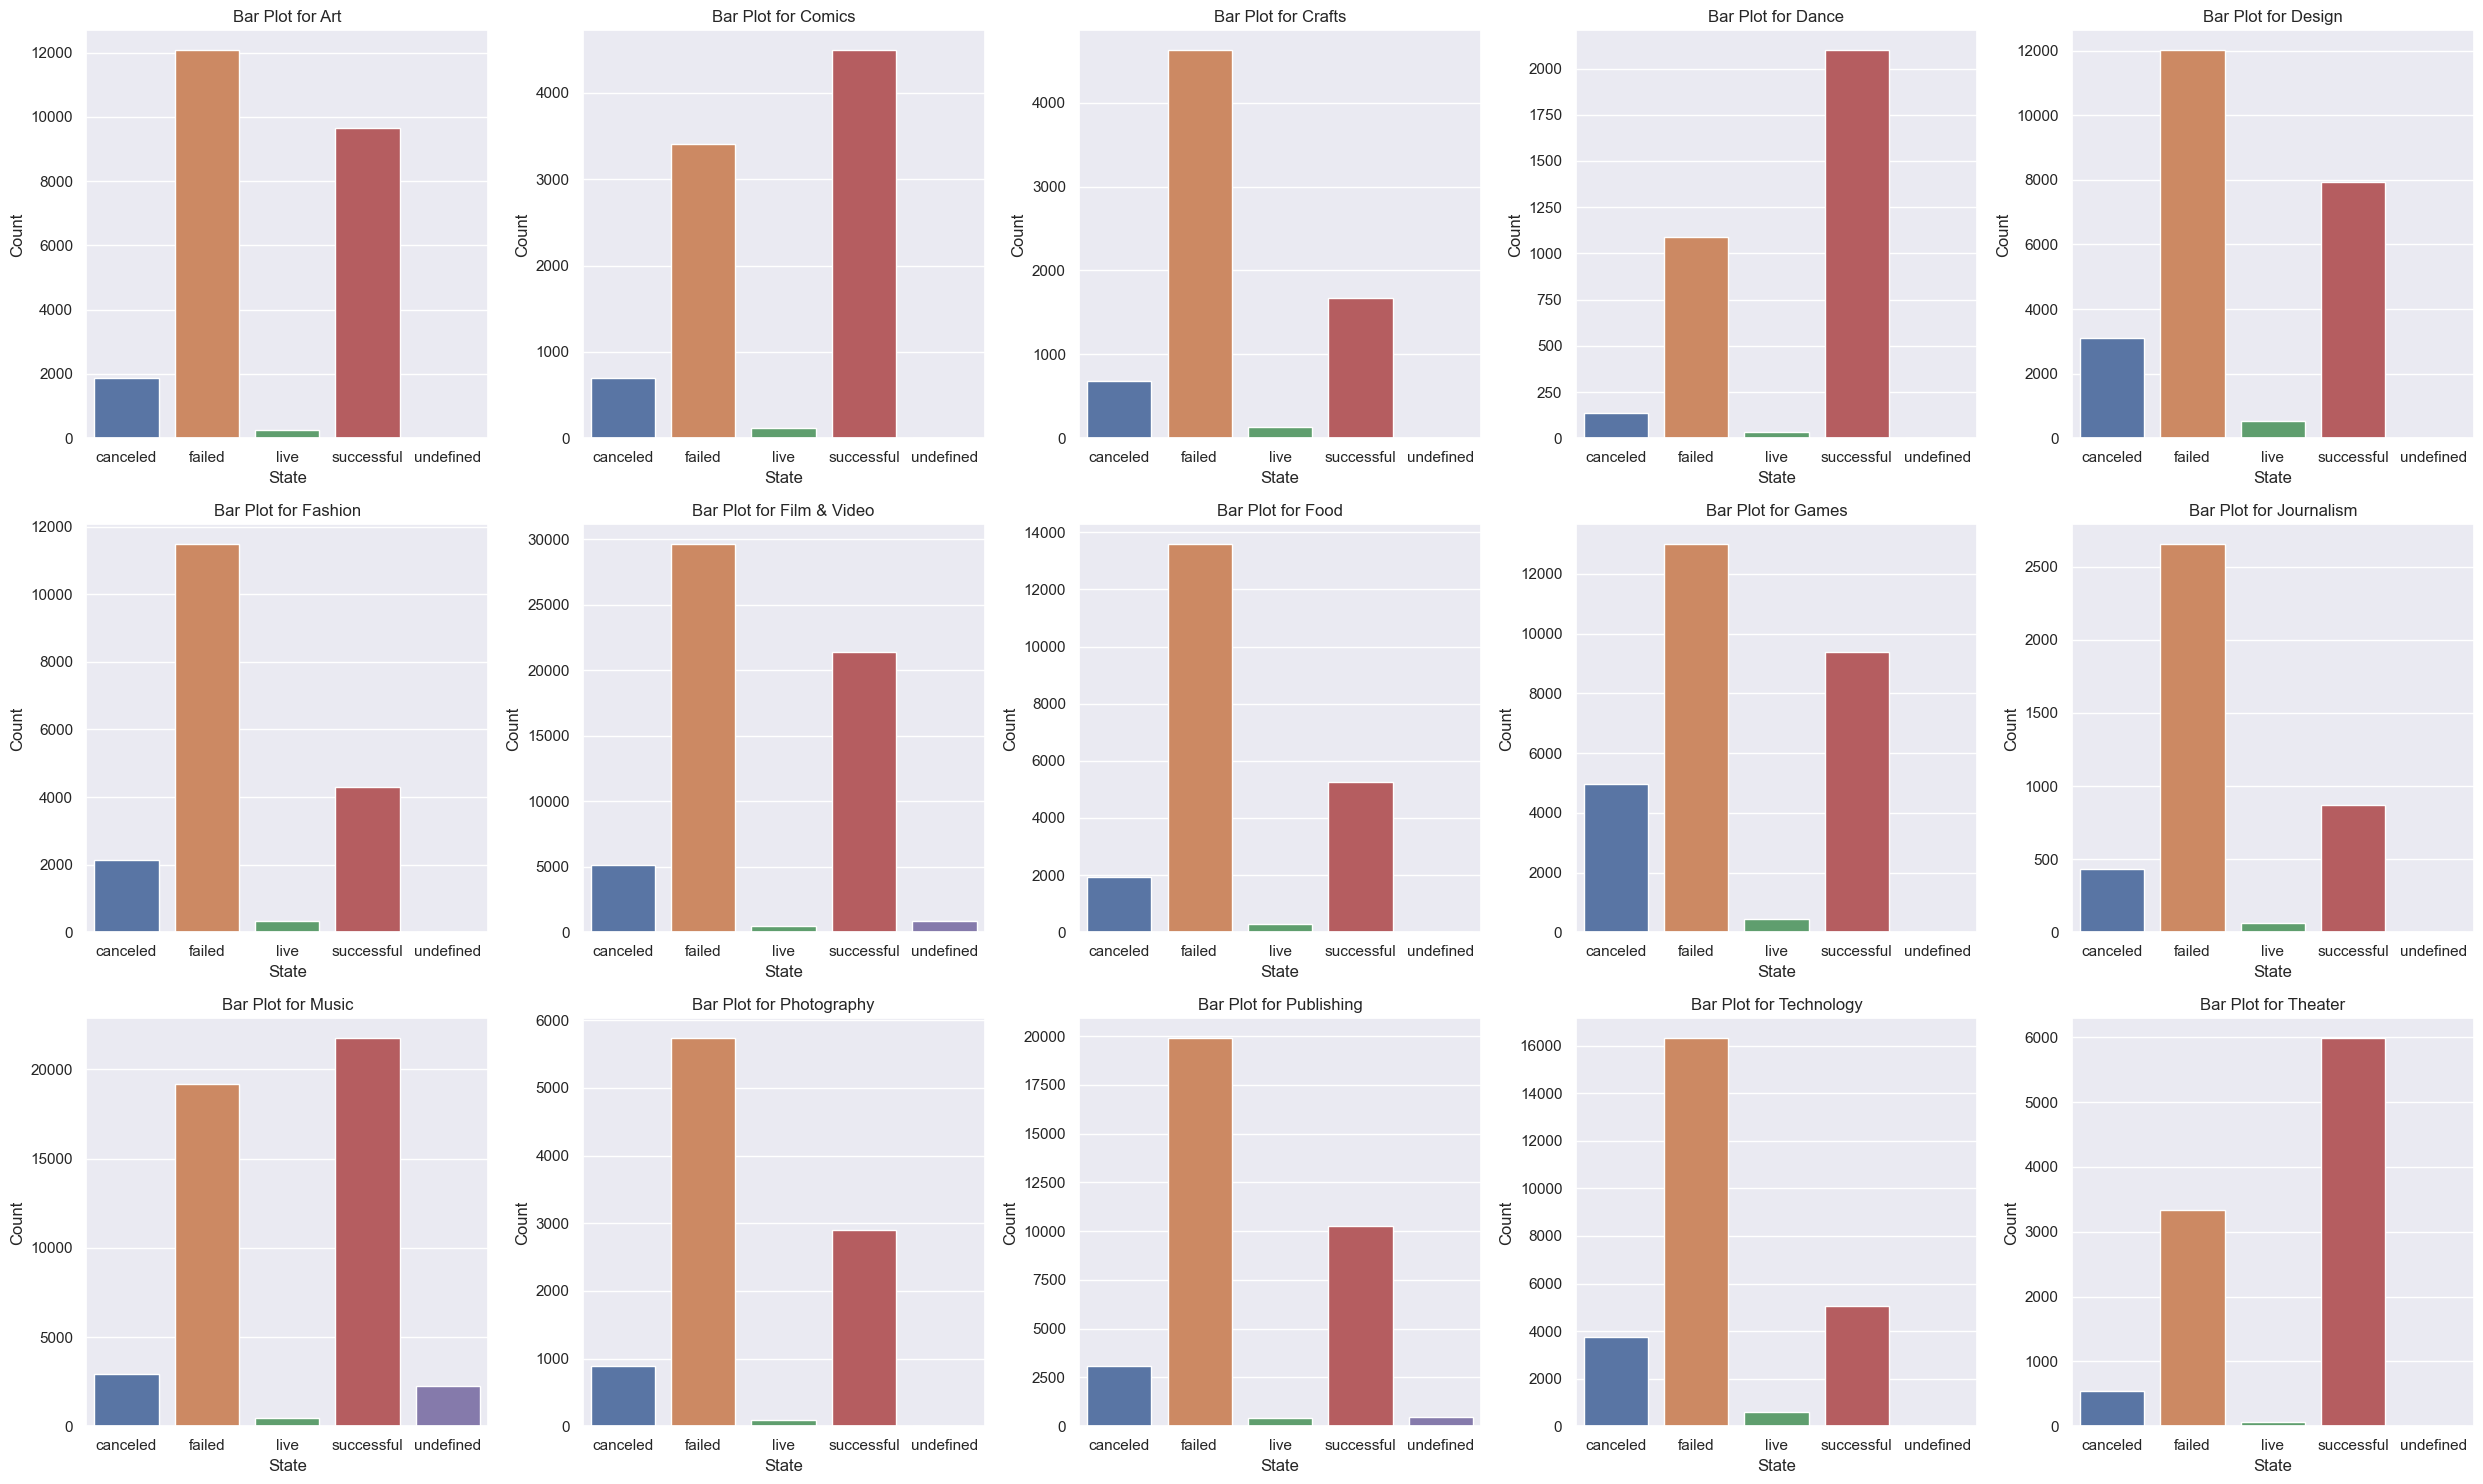

In [77]:
num_rows = 3
num_cols = 5

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 15))

for row_idx in range(num_rows):
    for col_idx in range(num_cols):
        column = pivot_table.columns[row_idx * num_cols + col_idx]
        sns.barplot(x=pivot_table.index, y=column, data=pivot_table, ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f'Bar Plot for {column}')
        axes[row_idx, col_idx].set_xlabel('State')
        axes[row_idx, col_idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [78]:
pivot_table['total'] = pivot_table.sum(axis=1)

for index in pivot_table.index[0:]:
    pivot_table['percentage'] = pivot_table['total'] / pivot_table['total'].sum() * 100

pivot_table

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,total,percentage
state,,,,,,,,,,,,,,,,,
canceled,1885,702,681,137,3111,2125,5161,1932,4961,435,2938,884,3083,3748,546,32329,10.058023
failed,12088,3404,4630,1089,12024,11492,29646,13598,13003,2657,19193,5740,19915,16332,3337,168148,52.313292
live,254,117,138,32,523,326,499,277,457,60,467,85,446,612,65,4358,1.355837
successful,9651,4499,1670,2101,7939,4306,21404,5253,9382,869,21761,2903,10253,5054,5990,113035,35.166835
undefined,0,0,0,1,2,3,851,0,1,0,2230,1,462,3,1,3555,1.106012


## Success rate by Country

In [79]:
pivot_table = df_clean.pivot_table(index='country ', columns='state ',
                                   values='ID ', aggfunc='count', fill_value=0)

In [80]:
pivot_table

state,canceled,failed,live,successful,undefined
country,,,,,
AT,64,223,26,60,0
AU,855,3733,124,1450,0
BE,50,250,18,79,0
CA,1762,6832,233,3067,0
CH,45,303,29,86,0
DE,405,1600,117,530,0
DK,113,441,31,231,0
ES,191,847,84,242,0
FR,237,1045,106,512,0


In [81]:
pivot_table['total'] = pivot_table.sum(axis=1)

for index in pivot_table.index[0:]:
    pivot_table['success_percentage'] = pivot_table['successful'] / pivot_table['total'] * 100

In [82]:
pivot_table

state,canceled,failed,live,successful,undefined,total,success_percentage
country,,,,,,,
AT,64,223,26,60,0,373,16.085791
AU,855,3733,124,1450,0,6162,23.531321
BE,50,250,18,79,0,397,19.899244
CA,1762,6832,233,3067,0,11894,25.786111
CH,45,303,29,86,0,463,18.574514
DE,405,1600,117,530,0,2652,19.984917
DK,113,441,31,231,0,816,28.308824
ES,191,847,84,242,0,1364,17.741935
FR,237,1045,106,512,0,1900,26.947368


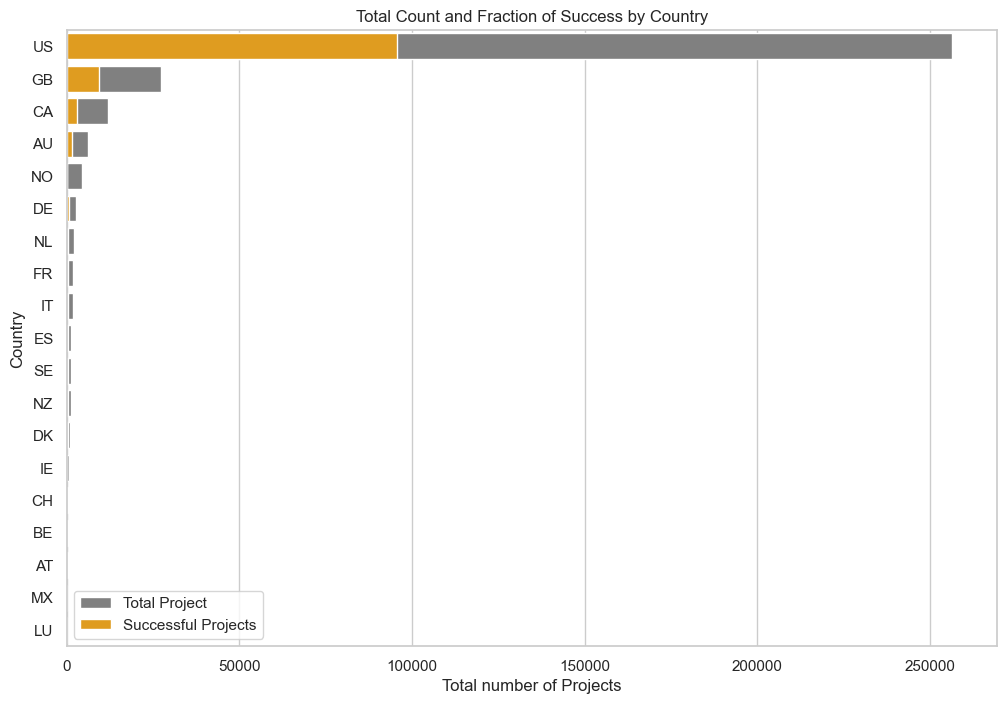

In [83]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

sns.barplot(data=pivot_table, x=pivot_table['total'], y=pivot_table.index,
            color='gray', label='Total Project',
           order = pivot_table['total'].sort_values(ascending = False).keys())
sns.barplot(data=pivot_table, x=pivot_table['successful'], y=pivot_table.index,
            color='orange', label='Successful Projects',
           order = pivot_table['total'].sort_values(ascending = False).keys())

# Create bar plot for fraction of success


plt.title('Total Count and Fraction of Success by Country')
plt.xlabel('Total number of Projects')
plt.ylabel('Country')
plt.legend()

plt.show()

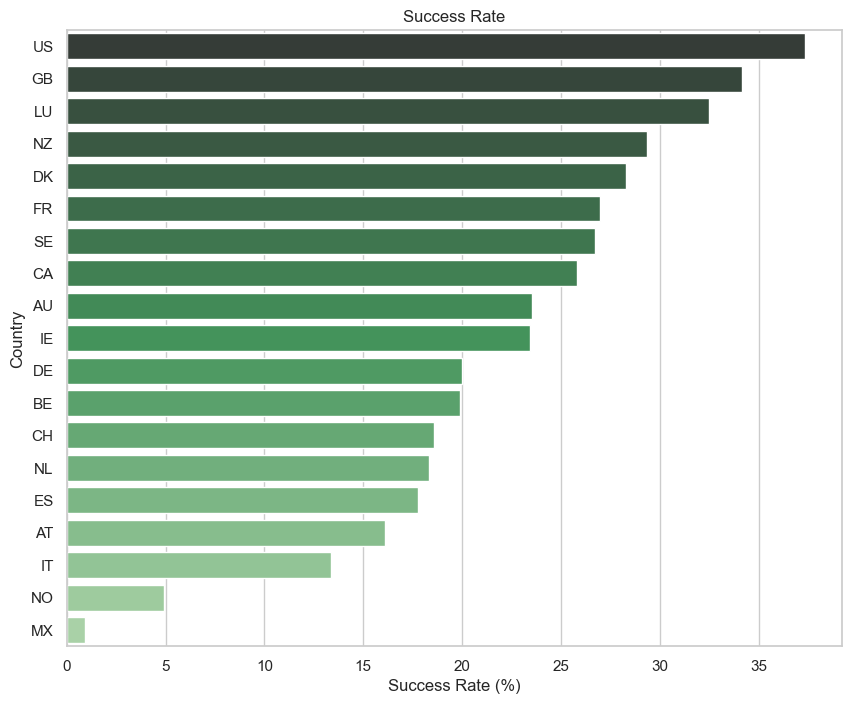

In [84]:
pal=sns.color_palette("Greens_d", 19)

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=pivot_table,y=pivot_table.index,
            x=pivot_table['success_percentage'],
            order = pivot_table['success_percentage'].sort_values(ascending = False).keys(),
           palette=np.array(pal[::-1]))

plt.xlabel("Success Rate (%)")
plt.ylabel('Country')
plt.title('Success Rate')
plt.show()

## Success Rate by Main Category

In [85]:
pivot_table = df_clean.pivot_table(index='main_category ', columns='state ', values='ID ', aggfunc='count', fill_value=0)

In [86]:
pivot_table

state,canceled,failed,live,successful,undefined
main_category,,,,,
Art,1885,12088,254,9651,0
Comics,702,3404,117,4499,0
Crafts,681,4630,138,1670,0
Dance,137,1089,32,2101,1
Design,3111,12024,523,7939,2
Fashion,2125,11492,326,4306,3
Film & Video,5161,29646,499,21404,851
Food,1932,13598,277,5253,0
Games,4961,13003,457,9382,1


In [87]:
pivot_table['total'] = pivot_table.sum(axis=1)
    
for index in pivot_table.index[0:]:
    pivot_table['success_percentage'] = pivot_table['successful'] / pivot_table['total'] * 100

In [88]:
pivot_table

state,canceled,failed,live,successful,undefined,total,success_percentage
main_category,,,,,,,
Art,1885,12088,254,9651,0,23878,40.417958
Comics,702,3404,117,4499,0,8722,51.582206
Crafts,681,4630,138,1670,0,7119,23.458351
Dance,137,1089,32,2101,1,3360,62.529762
Design,3111,12024,523,7939,2,23599,33.641256
Fashion,2125,11492,326,4306,3,18252,23.591935
Film & Video,5161,29646,499,21404,851,57561,37.184899
Food,1932,13598,277,5253,0,21060,24.943020
Games,4961,13003,457,9382,1,27804,33.743346


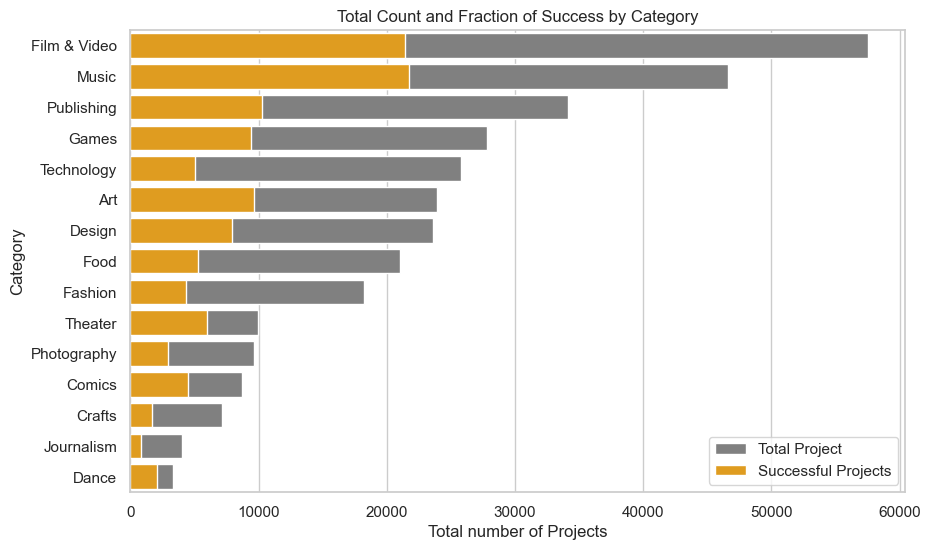

In [89]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.barplot(data=pivot_table, x=pivot_table['total'], y=pivot_table.index,
            color='gray', label='Total Project',
           order = pivot_table['total'].sort_values(ascending = False).keys())
sns.barplot(data=pivot_table, x=pivot_table['successful'], y=pivot_table.index,
            color='orange', label='Successful Projects',
           order = pivot_table['total'].sort_values(ascending = False).keys())

# Create bar plot for fraction of success


plt.title('Total Count and Fraction of Success by Category')
plt.xlabel('Total number of Projects')
plt.ylabel('Category')
plt.legend()

plt.show()

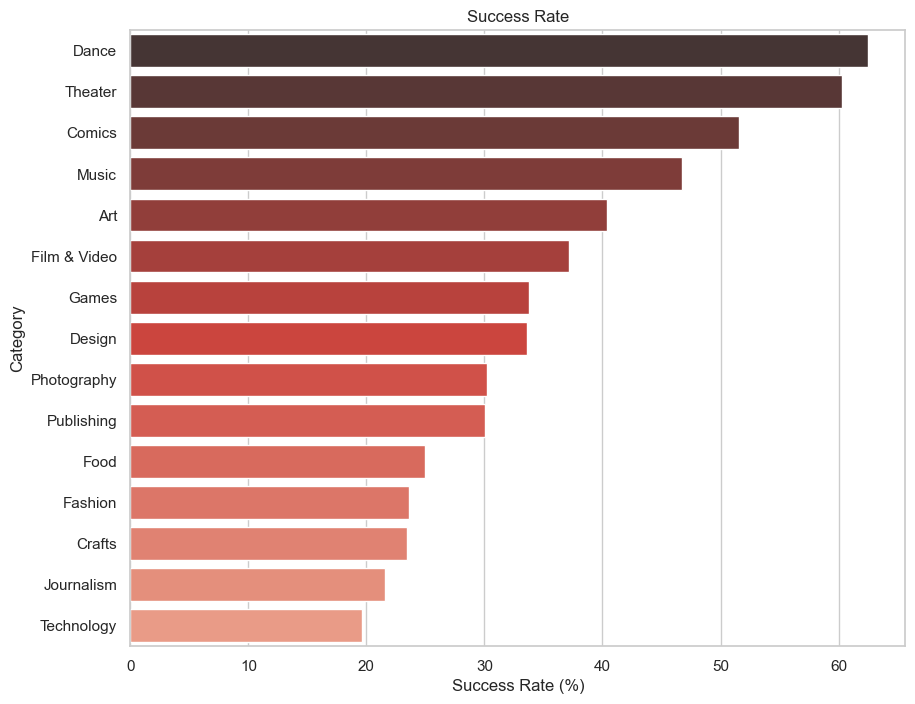

In [90]:
pal=sns.color_palette("Reds_d", len(pivot_table.index))

plt.figure(figsize=(10, 8))
sns.barplot(data=pivot_table,y=pivot_table.index,
            x=pivot_table['success_percentage'],
            order = pivot_table['success_percentage'].sort_values(ascending = False).keys(),
           palette=np.array(pal[::-1]))
plt.xlabel("Success Rate (%)")
plt.ylabel('Category')
plt.title('Success Rate')
plt.show()

In [91]:
#df_clean

In [92]:
#pivot_table = df_clean.pivot_table(index='launched ', columns='state ',
#                                   values='ID ', aggfunc='count', fill_value=0)

### Un feature intéressant serait de connaitre le nombre de jour que la campagne a été ouverte, c'est pourquoi nous créons la feature "aperture_days" 

In [93]:
df_clean['aperture_days'] = (df_clean['deadline '] - df_clean['launched ']).dt.days
df_clean

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Fund_Target,aperture_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0,58
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,0,45
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,0,30
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,0,55
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,0,30
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,0,27
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,0,45
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,0,30


## Statistiques générales et repérage d'outliers potentiels

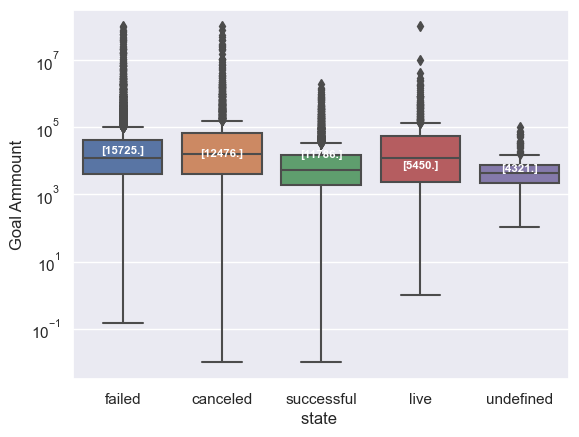

In [94]:
goal = df_clean[['goal ','state ']].copy()
goal = goal.drop_duplicates()

sns.set(style='darkgrid')
box_plot = sns.boxplot(data=goal, y="goal ", x="state ")

medians = goal.groupby('state ').median().values
vertical_offset = goal['goal '].median() * 0.05

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
    
plt.yscale('log')
plt.ylabel('Goal Ammount')
plt.show()

#### Les points marqués au dessus de la "moustache" supérieure sont essentiellement considérer des "outliers", cependant faisant une analyse et en explorant ces quantité, nous ne pouvons pas considérer un but monétaire de campagne élevé comme un outlier étant donné que ceci peut étre raisonable. A titre d'exemple, si un utilisateur décide de lancer une campagne pour un projet en technologie necessitant l'echat de machine couteuse, il est formtement possible que le but monetaire pour ce projet soit dans l'ordre des millions. Ainsi, nous gardons ces informations bien qu'elle pourraient sembler des infromation "outliers"

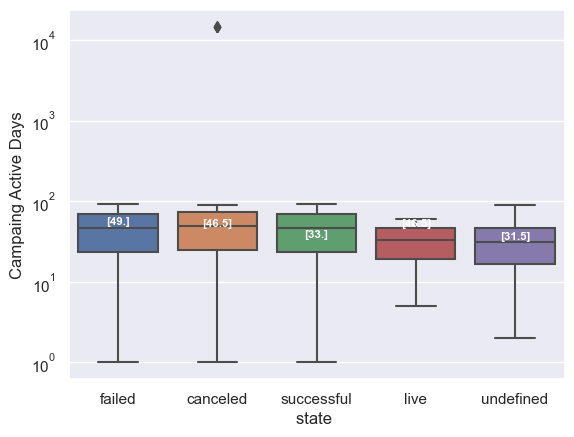

In [95]:
goal = df_clean[['aperture_days','state ']].copy()
goal = goal.drop_duplicates()

sns.set(style='darkgrid')
box_plot = sns.boxplot(data=goal, y="aperture_days", x="state ")

medians = goal.groupby('state ').median().values
vertical_offset = goal['aperture_days'].median() * 0.05

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
    
plt.yscale('log')
plt.ylabel('Campaing Active Days')
plt.show()

# Modèle ML

In [96]:
df_ml = df_clean.drop(['ID ','name ','category ', 'currency ','deadline ','launched ','pledged '],axis=1)
object = df_ml.select_dtypes(include=['object']).columns.tolist()

## "Codification" des features afin d'être utiles et lisibles par notre modèle ML

Nous avons opté pour l'utilisation d'un encodement de type "One-Hot Encoding" pour les caractéristiques catégorielles (catégories sans ordre naturel), l'encodage "one-hot" est une approche courante. Il crée des colonnes binaires pour chaque catégorie afin d'etre exploitables par le modèle.

In [97]:
dummies = pd.get_dummies(df_clean[object],drop_first=False)
df_ml= pd.concat([df_ml.drop(object,axis=1),dummies],axis=1)

In [98]:
df_ml

,goal,backers,usd pledged,Fund_Target,aperture_days,main_category _Art,main_category _Comics,main_category _Crafts,main_category _Dance,main_category _Design,...,country _GB,country _IE,country _IT,country _LU,country _MX,country _NL,country _NO,country _NZ,country _SE,country _US
0,1000.0,0,0.0,0,58,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,45000.0,3,220.0,0,45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5000.0,1,1.0,0,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19500.0,14,1283.0,0,55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,50000.0,224,52375.0,1,35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,50000.0,1,25.0,0,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323746,1500.0,5,155.0,0,27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323747,15000.0,1,20.0,0,45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323748,15000.0,6,200.0,0,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Regardons la dépendance ou relation qu'il existe entre le différente données afin d'éliminier des variable colinéaires ou covariantes

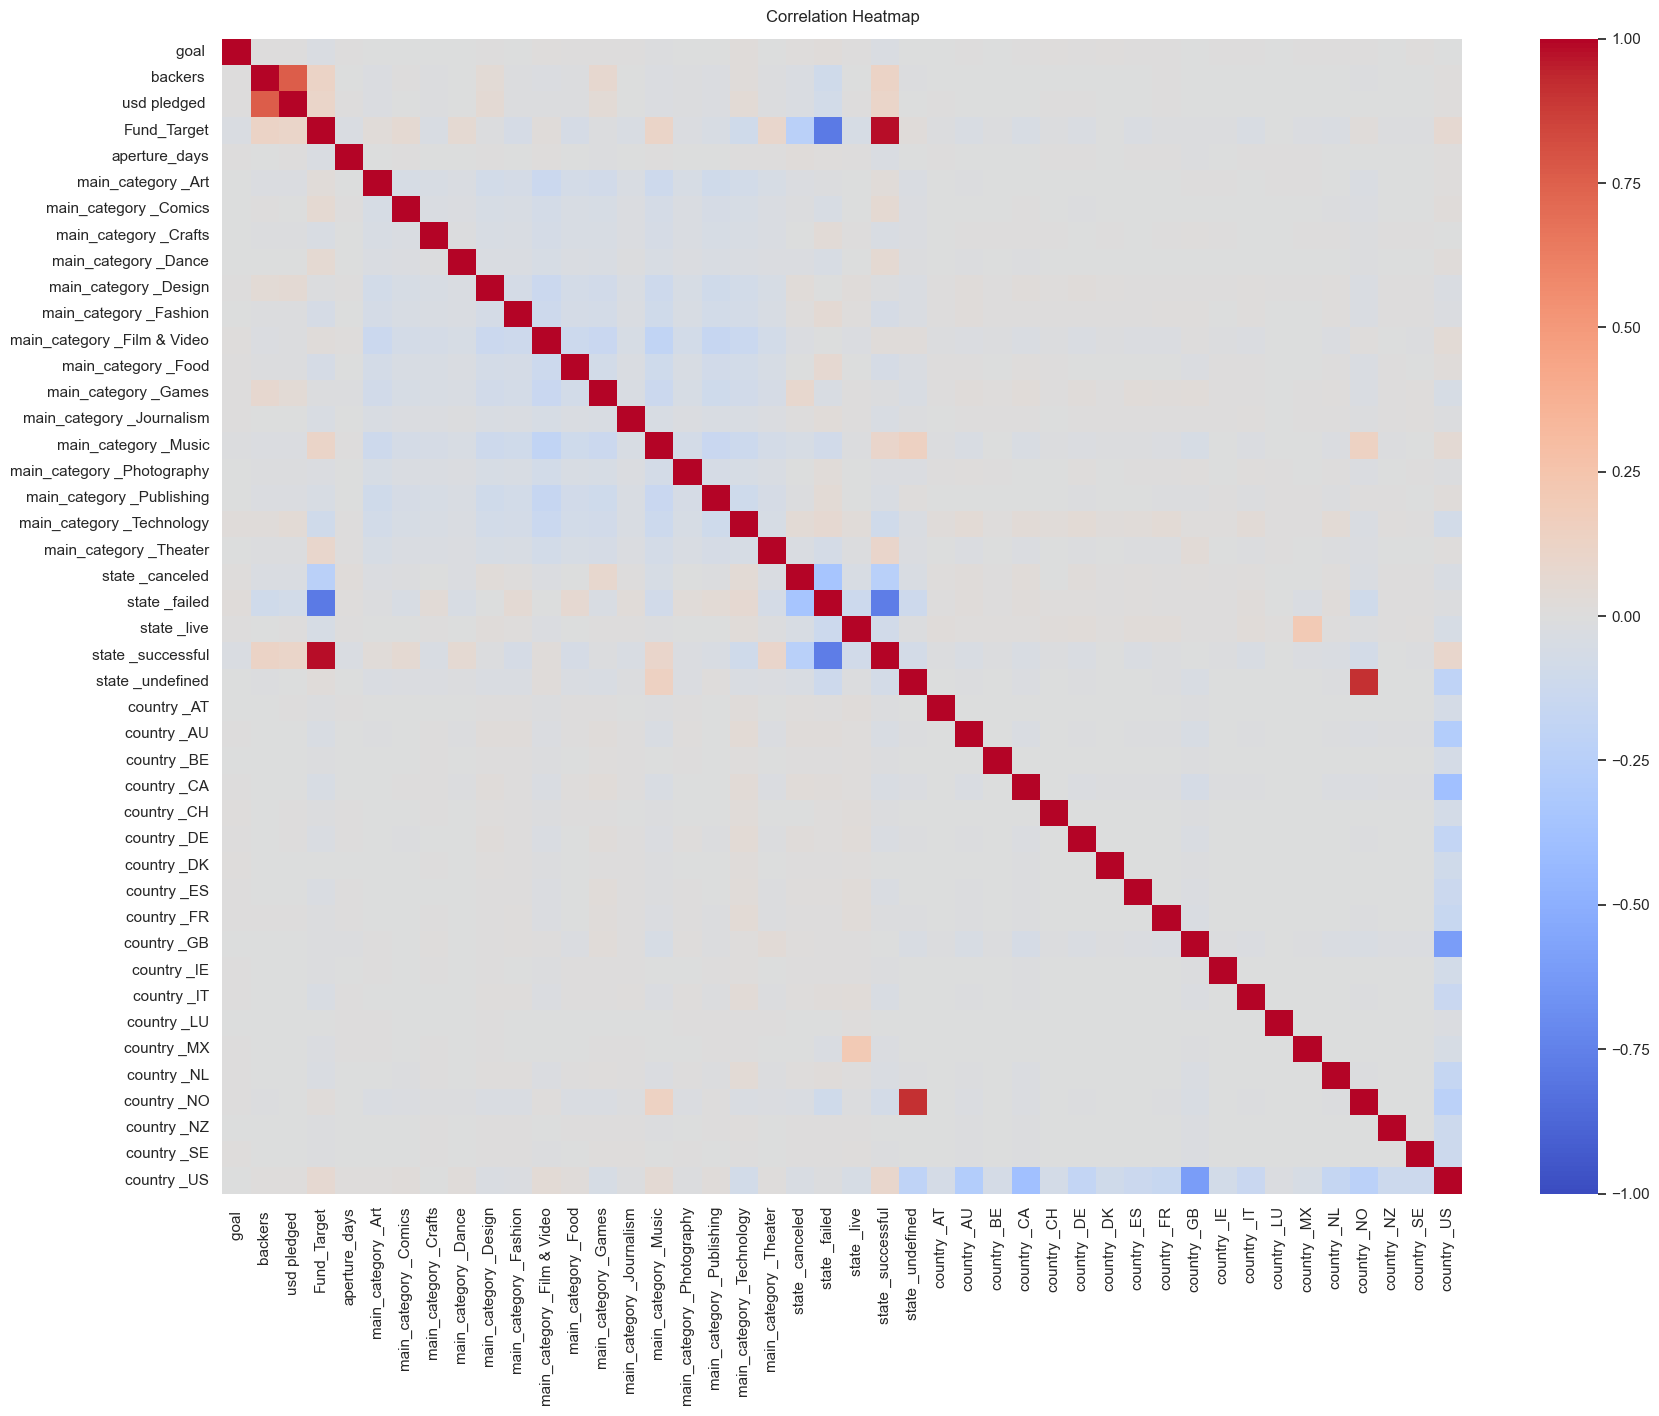

In [99]:
corr = df_ml.corr()
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1,cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### On peut voir la forte colinerite entre Fund_Target et Successful. On peut aussi voir que si un projet est réussi il ne peut pas etre failli, il existe donc aussi un colinearite "negative" entre ces deux caracteristique. On peut ainsi decider d'en garder une seule. Pour faciliter le modele on garde le feature state_successful et on se debarasse des features Fund_Target et state_failed

In [100]:
df_ml = df_ml.drop(['Fund_Target','state _failed'],axis=1)

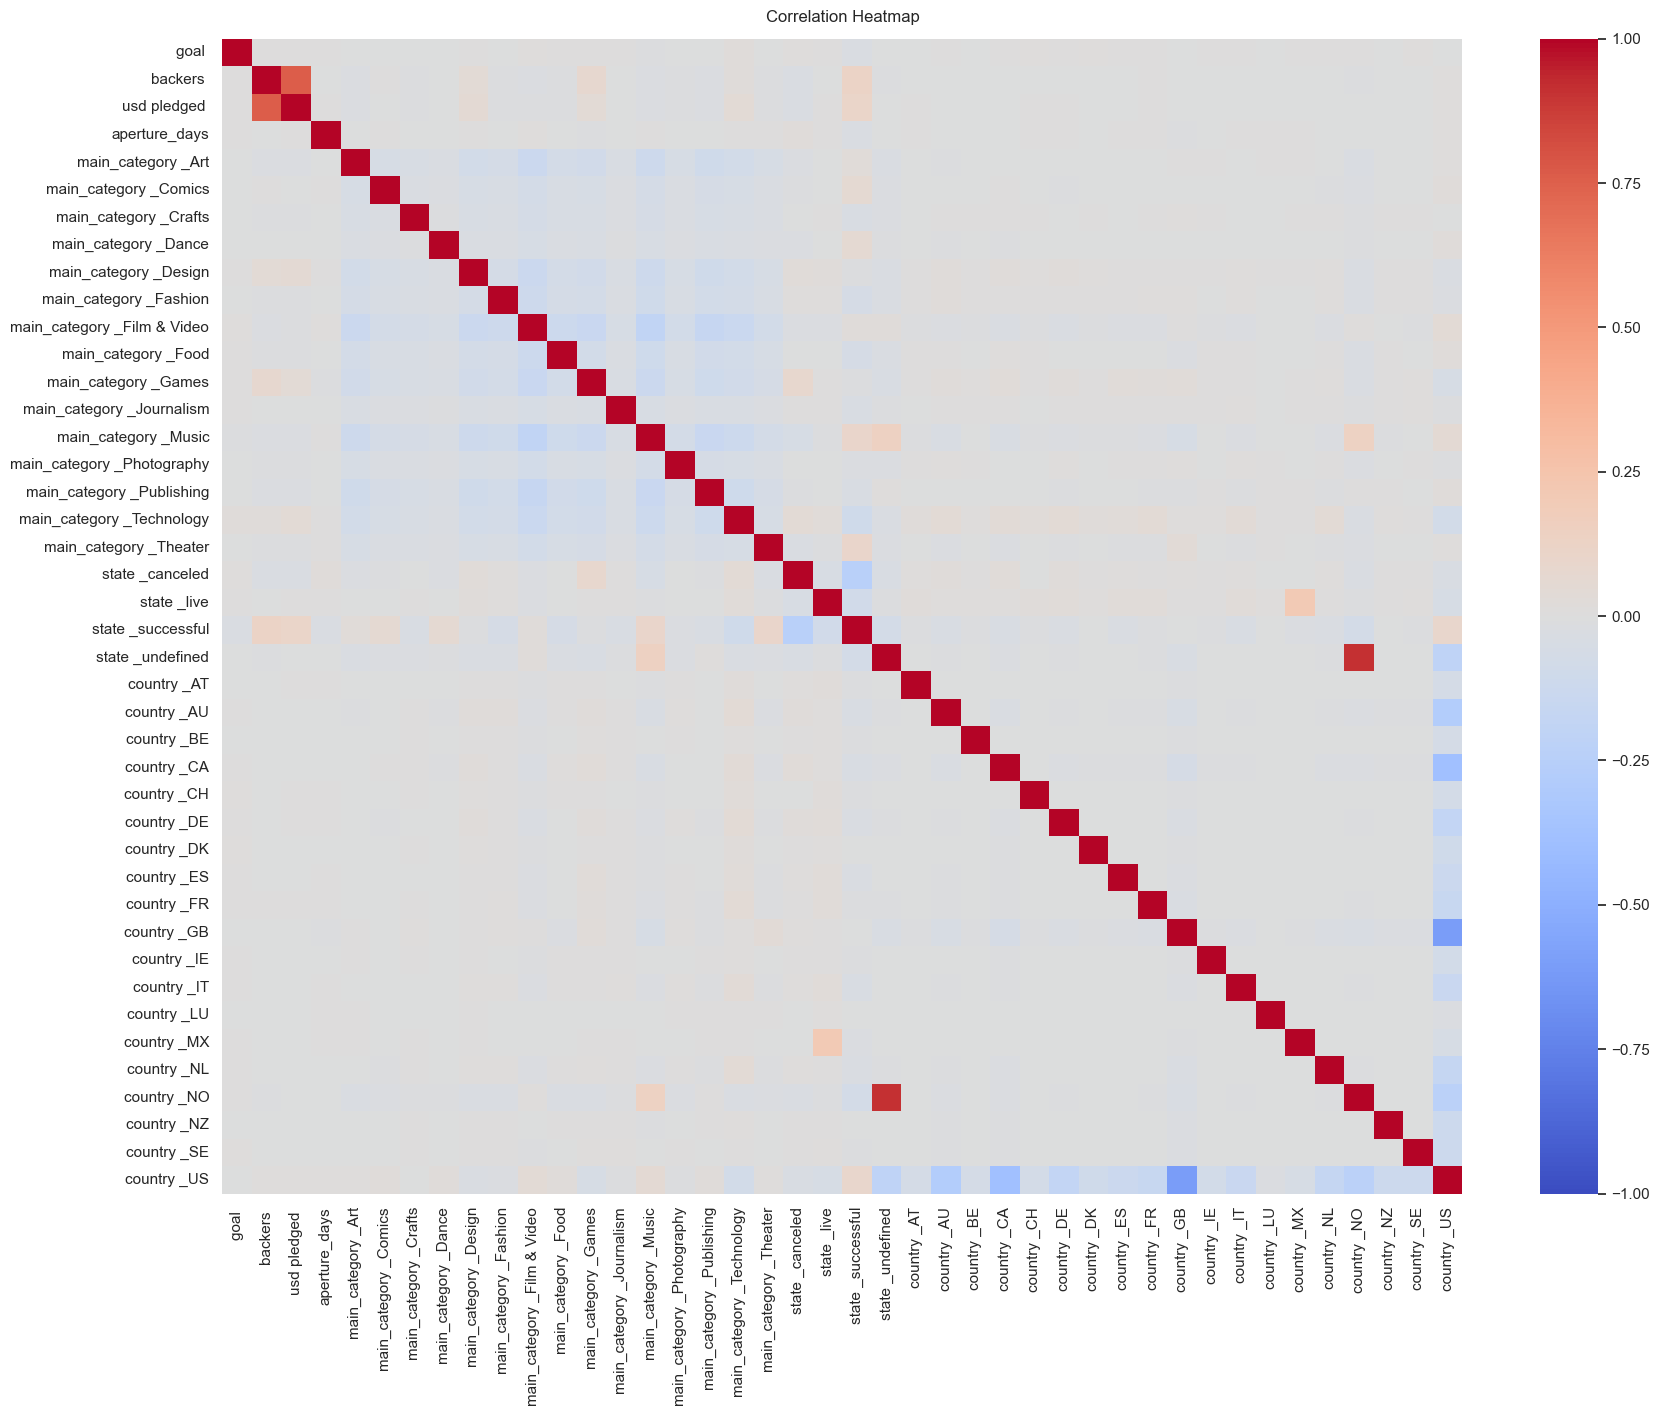

In [101]:
corr = df_ml.corr()
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1,cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Création et division des données pour entrainement et construction du modèle ML

In [102]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('state _successful',axis=1).values
y = df_ml['state _successful'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalization des données

La mise à l'échelle Min-Max ou normalisation, est une méthode commune pour mettre à l'échelle et transformer les caractéristiques d'un ensemble de données de manière à ce qu'elles se situent dans une plage spécifiée et conforme. L'objectif est de remettre à l'échelle les caractéristiques dans un intervalle commun afin d'attribuer la même importance a toutes les caractéristiques présentes

La formule suivante est appliqué à chacune des caractéristiques:

$$
 \frac{valeur_{originelle} − valeur_{min}}{valeur_{max} - valeur_{min}}
$$

Cette transformation garantit que toutes les valeurs des caractéristiques sont mappées dans l'intervalle.

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Le but ultime de ce modèle est qu'il nous permette de prédire si une campagne sera fructueuse ou non. Ceci est un clair exemple d'un problème de classification. Nous alons ainsi limiter nos comparaison de modèles à des modèles foertement adapté pour ce type de problèmes. Étant donné la nature du problème et la structure des données de travail nous avons décidé de nous concentrer sur les méthodes d'ensemble (decicion trees et Random forest) sauf pour notre dernier modèle.

## Decision Tree Model

In [104]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Model evaluation using classification report & confusion matrix

In [105]:
from sklearn.metrics import classification_report,confusion_matrix

dtreePred = dtree.predict(X_test)

print(classification_report(y_test,dtreePred))

print('Matrice de confusion: \n')
print(confusion_matrix(y_test,dtreePred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41748
           1       0.99      1.00      0.99     22537

    accuracy                           1.00     64285
   macro avg       1.00      1.00      1.00     64285
weighted avg       1.00      1.00      1.00     64285

Matrice de confusion: 

[[41603   145]
 [  107 22430]]


## Random Forest Model

In [106]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

### Model evaluation using classification report & confusion matrix

In [107]:
rfcPred = rfc.predict(X_test)

print(classification_report(y_test,rfcPred))

print('Matrice de confusion: \n')
print(confusion_matrix(y_test,rfcPred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     41748
           1       0.99      1.00      0.99     22537

    accuracy                           0.99     64285
   macro avg       0.99      1.00      0.99     64285
weighted avg       0.99      0.99      0.99     64285

Matrice de confusion: 

[[41475   273]
 [   75 22462]]


## Extreme Gradient Boosting

In [108]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

### Model evaluation using classification report & confusion matrix

In [109]:
xgb_pred = xgb_model.predict(X_test)

print(classification_report(y_test,xgb_pred))

print('Matrice de confusion: \n')
print(confusion_matrix(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41748
           1       0.99      1.00      1.00     22537

    accuracy                           1.00     64285
   macro avg       1.00      1.00      1.00     64285
weighted avg       1.00      1.00      1.00     64285

Matrice de confusion: 

[[41634   114]
 [    8 22529]]


## Ajout d'un algorithme pondérée/ajustement


### Il ne faut pas oublie que l'ensemble de données n'est pas balancé, en effet il existe un plus grande quantité de campagnes non réussies que de campagnes réussies. Ainsi, on peut tenir compte de cet imbalance en calculant un poids (determiner par la difference qui existe entre chancune des catégories) afin de venir ajouter ce facteur dans notre modele ML pour contrebalancer cet aspect d'inegalité.

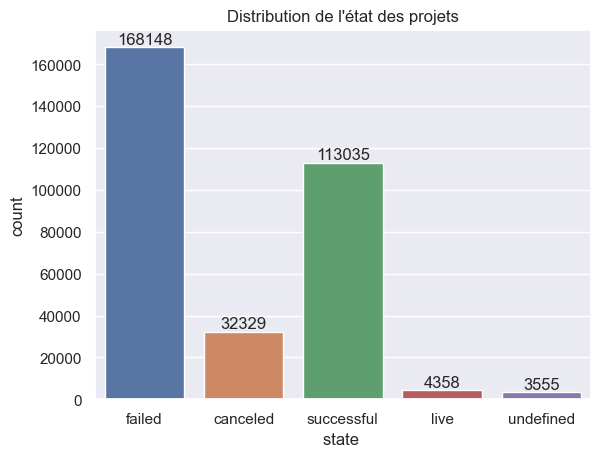

In [110]:
sns.set(style='darkgrid')
ax = sns.countplot(x='state ', data = df_clean)

# Annotate the counts on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., 
            p.get_height() + 0.2, 
            f'{int(p.get_height())}', 
            ha='center', 
            va='bottom')
plt.title("Distribution de l'état des projets")
plt.show()

### Calcul du facteur de podération, il suffit d'utiliser le ratio qui existe entre la quantité de campagnes "failed" avec la quantié de campagne "successful" afin d'attribuer un poids qui vienne compenser cet imbalancement qui existe dans notre ensemble de donnée et diminuer ainsi le biais vers des campagnes "failed"

In [111]:
scale_weight = 168148/113035

In [112]:
scale_weight

1.4875746450214535

In [113]:
xgb_weight_model = xgb.XGBClassifier(scale_pos_weight=scale_weight)
xgb_weight_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Model evaluation using classification report & confusion matrix

In [114]:
xgb_weight_model_pred = xgb_weight_model.predict(X_test)

print(classification_report(y_test,xgb_weight_model_pred))

print('Matrice de confusion: \n')
print(confusion_matrix(y_test, xgb_weight_model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41748
           1       1.00      1.00      1.00     22537

    accuracy                           1.00     64285
   macro avg       1.00      1.00      1.00     64285
weighted avg       1.00      1.00      1.00     64285

Matrice de confusion: 

[[41643   105]
 [    4 22533]]


### Courbes ROC pour évaluation du modèle construit et entrainer

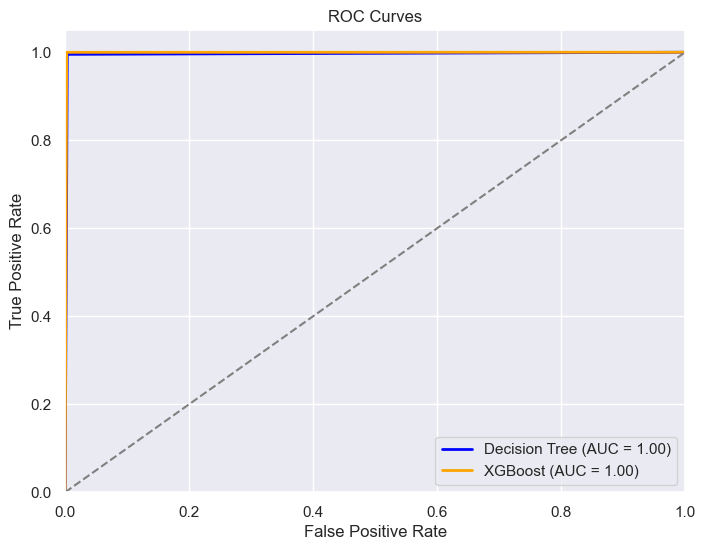

In [115]:
from sklearn.metrics import roc_curve, auc

# Modele de Decision Tree
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, dtreePred)
roc_auc_dt = auc(fpr_dtree, tpr_dtree)

# Modele XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_weight_model_pred)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dtree, tpr_dtree, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

### Nous trouvon une valeur AUC de 1.00 pour les deux modèles. De plus, nous pouvons voir que la quantité de faux positif et faux negatif est extrement faible et que l'ajout de l'algorithme de pondération a eu un effet positif sur notre modèle. Ainsi, le modèle qui devrait être utilisé serait le Extreme Gradient Boosting muni de la pondération de perte.

## Test à l'aide d'une campagne aléatoire

In [116]:
import random
random.seed(101)

random_id = random.randint(0,len(df_ml))
new_campaign = df_ml.drop('state _successful',axis=1).iloc[random_id]

new_campaign.values.shape[0]
new_campaign = scaler.transform(new_campaign.values.reshape(1,new_campaign.shape[0]))

In [117]:
new_pred = xgb_weight_model.predict(new_campaign)
print('La classe pour cette campagne est de :',new_pred[0])

La classe pour cette campagne est de : 0
